In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Submission data

In [2]:
ALL_DATA_PATH = "./example-data/processed_20220101_20220331_submissions.jsonl"
USER_DATA_PATH = "./example-data/poster_stats_all_(posts>=1).json"

In [4]:
# load all data
all_data = pd.read_json(ALL_DATA_PATH, lines=True)
all_data = all_data.rename(columns={"created_utc": "utc", "link_flair_text": "flair", "removed_by_category": "removed"})

# customize columns
flaired = list(all_data["flair"].notnull())
all_data["flaired"] = flaired

is_removed = list(all_data["removed"].notnull())
all_data["is_removed"] = is_removed

In [5]:
all_data.head(3)

,post_id,author,total_posts,title,selftext,flair,removed,utc,date,month,score,upvote_ratio,num_comments,num_crossposts,subreddit_subscribers,flaired,is_removed
0,rt5jmb,Red_Bear_28,10,Is ahego actually sexy?,Ok im a cosplay fan and lately a lot of cospla...,Sex/NSFW,None,1640991642,2022-01-01 00:00:42,2022-01,1,1.0,0,0,1442902,True,False
1,rt5krl,disasterbabe,2,How do you come out to a group of straight guys?,[removed],Sexuality &amp; Gender,automod_filtered,1640991730,2022-01-01 00:02:10,2022-01,1,1.0,0,0,1442906,True,True
2,rt5m8u,icedark98,2,Did you have facade around friend and messagin...,,Interpersonal,None,1640991844,2022-01-01 00:04:04,2022-01,1,1.0,0,0,1442909,True,False


In [6]:
# get sub dataframe
removed_data = all_data[all_data["removed"].notnull()]
existing_data = all_data[all_data["removed"].isnull()]

flaired_data = all_data[all_data["flair"].notnull()]
flairless_data = all_data[all_data["flair"].isnull()]

removed_flaired_data = removed_data[removed_data["flair"].notnull()]
existing_flaired_data = flaired_data[flaired_data["removed"].isnull()]


In [7]:
flaired_data.head(3)

,post_id,author,total_posts,title,selftext,flair,removed,utc,date,month,score,upvote_ratio,num_comments,num_crossposts,subreddit_subscribers,flaired,is_removed
0,rt5jmb,Red_Bear_28,10,Is ahego actually sexy?,Ok im a cosplay fan and lately a lot of cospla...,Sex/NSFW,None,1640991642,2022-01-01 00:00:42,2022-01,1,1.0,0,0,1442902,True,False
1,rt5krl,disasterbabe,2,How do you come out to a group of straight guys?,[removed],Sexuality &amp; Gender,automod_filtered,1640991730,2022-01-01 00:02:10,2022-01,1,1.0,0,0,1442906,True,True
2,rt5m8u,icedark98,2,Did you have facade around friend and messagin...,,Interpersonal,None,1640991844,2022-01-01 00:04:04,2022-01,1,1.0,0,0,1442909,True,False


In [8]:
removed_data.head(3)

,post_id,author,total_posts,title,selftext,flair,removed,utc,date,month,score,upvote_ratio,num_comments,num_crossposts,subreddit_subscribers,flaired,is_removed
1,rt5krl,disasterbabe,2,How do you come out to a group of straight guys?,[removed],Sexuality &amp; Gender,automod_filtered,1640991730,2022-01-01 00:02:10,2022-01,1,1.0,0,0,1442906,True,True
7,rt5u33,xXMistaXx,4,What’s the difference between SRS vagina and c...,[removed],Sexuality &amp; Gender,moderator,1640992522,2022-01-01 00:15:22,2022-01,1,1.0,0,0,1442942,True,True
14,rt6gaz,itsme_imthewind,2,What are your thoughts on this Blues Clues Epi...,[removed],Sexuality &amp; Gender,moderator,1640994446,2022-01-01 00:47:26,2022-01,1,1.0,0,0,1443068,True,True


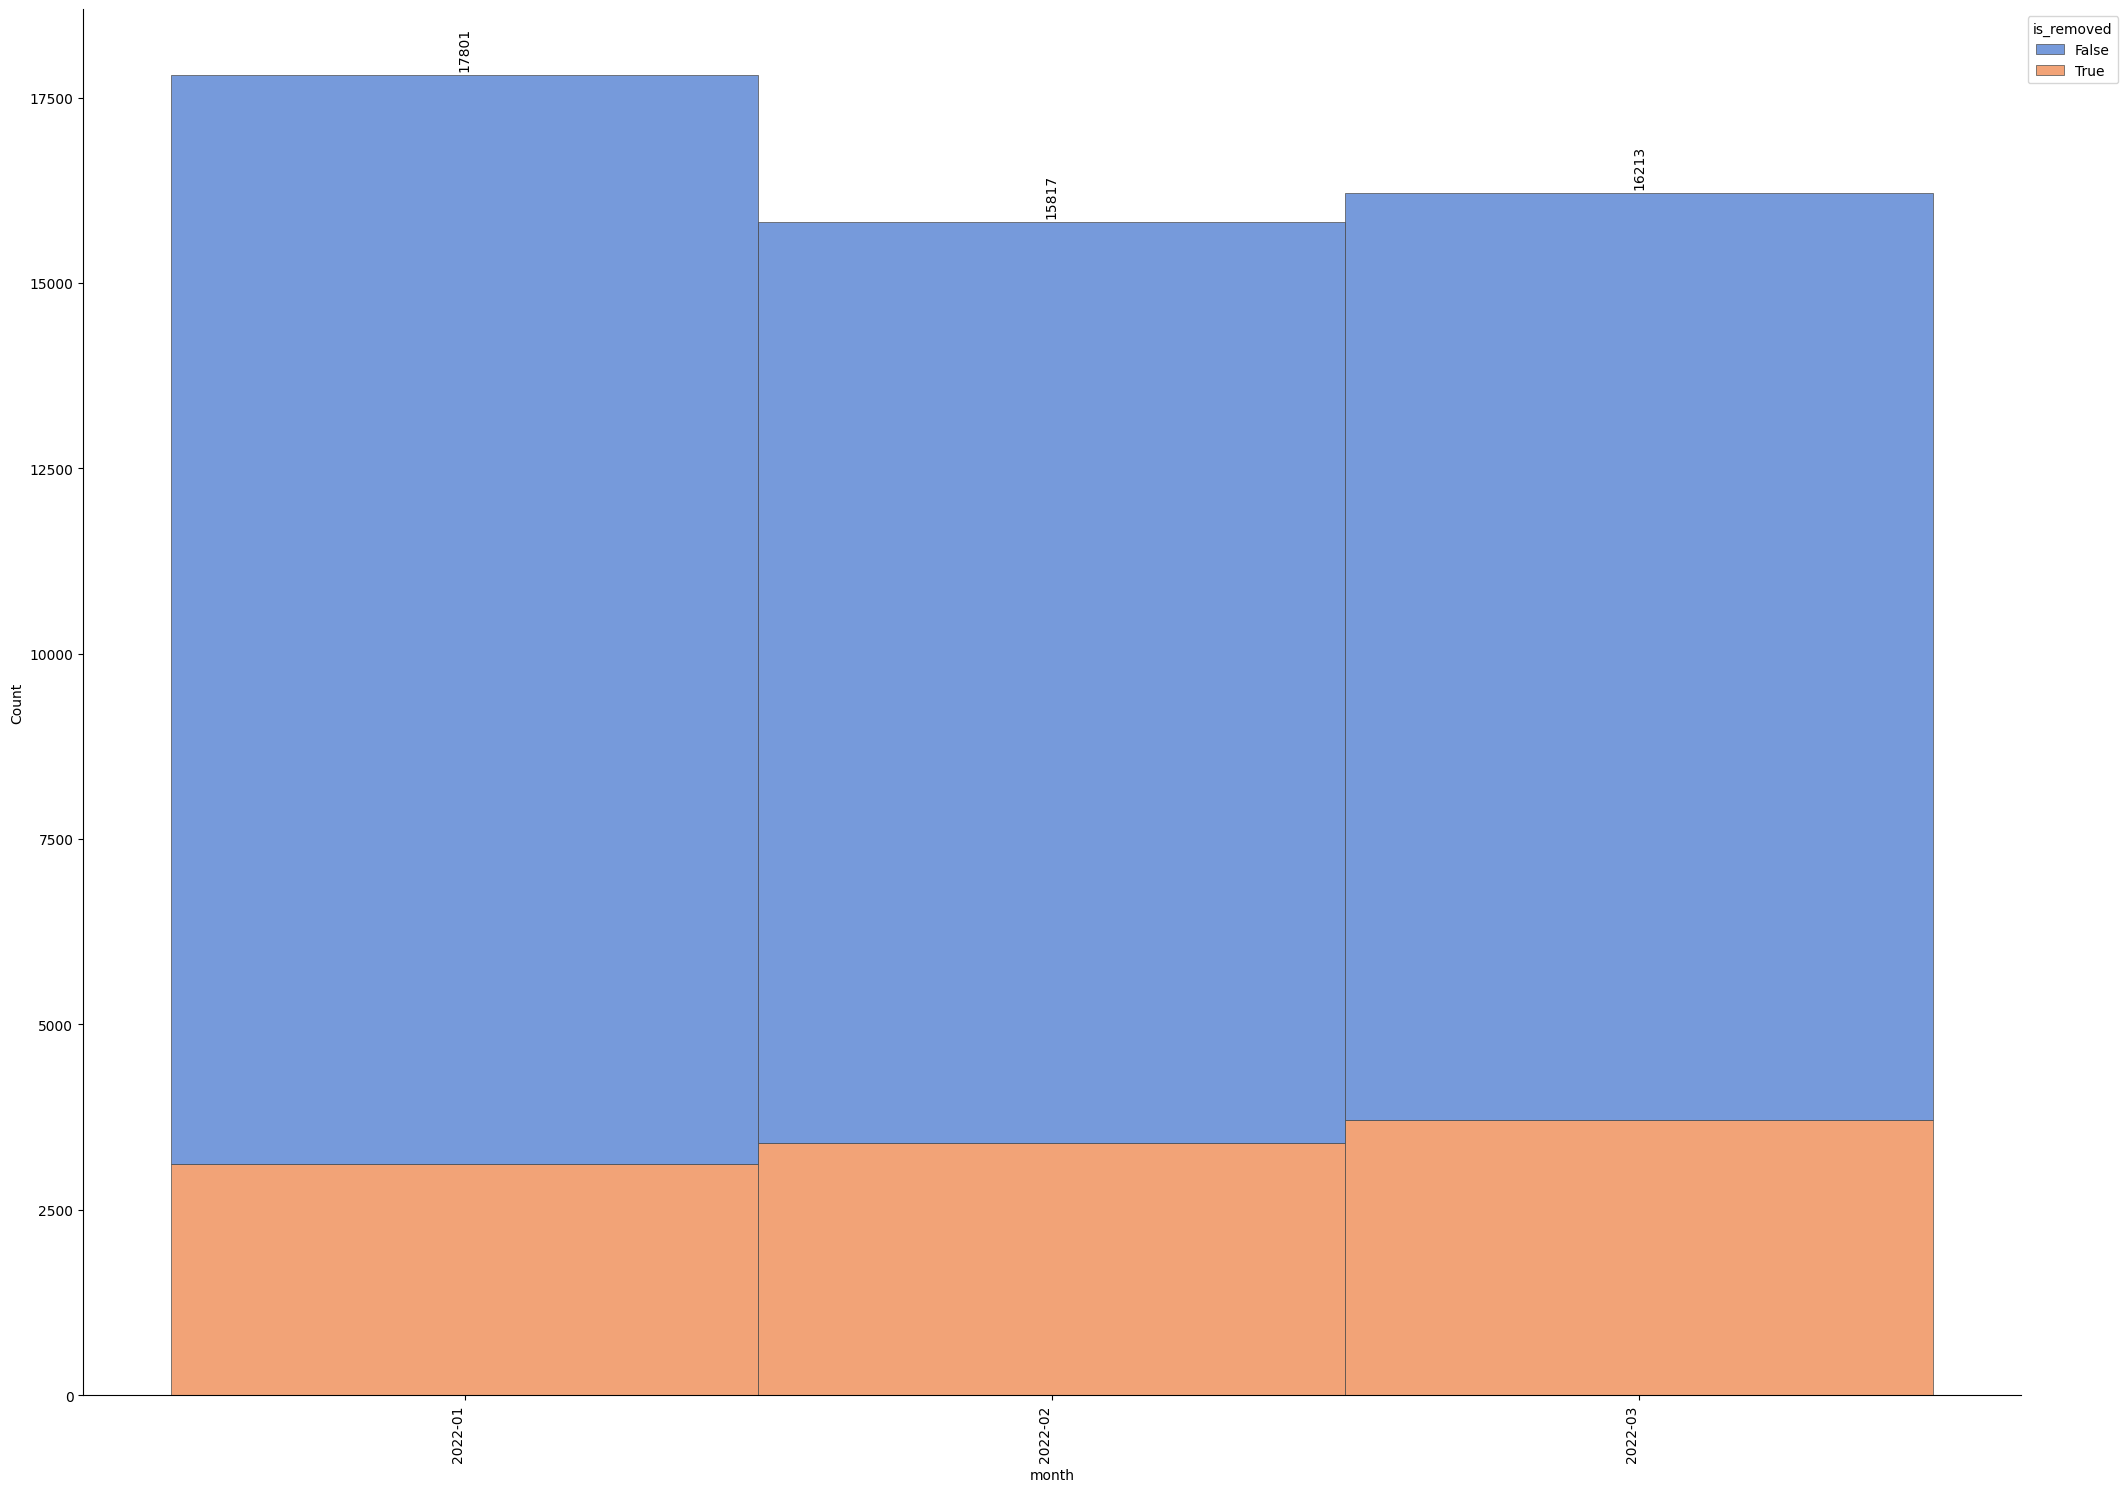

In [9]:
# plot removed data

f, ax = plt.subplots(figsize=(25, 18))
sns.despine(f)

ax = sns.histplot(
    all_data,
    x="month",
    hue="is_removed",
    multiple="stack",
    palette="muted",
    edgecolor=".3",
    linewidth=0.5,
)
coordinates = {}
for bin in ax._axes._children:
    if isinstance(bin, plt.Rectangle):
        x = bin._x0 + 0.5*bin._width
        y = bin._height

        if x not in coordinates:
            coordinates[x] = y
        else:
            coordinates[x] += y

for x, y in coordinates.items():
    plt.text(x, y+50, f"{y:.0f}", ha="center", va="bottom", rotation=90)

plt.xticks(rotation=90, ha='right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

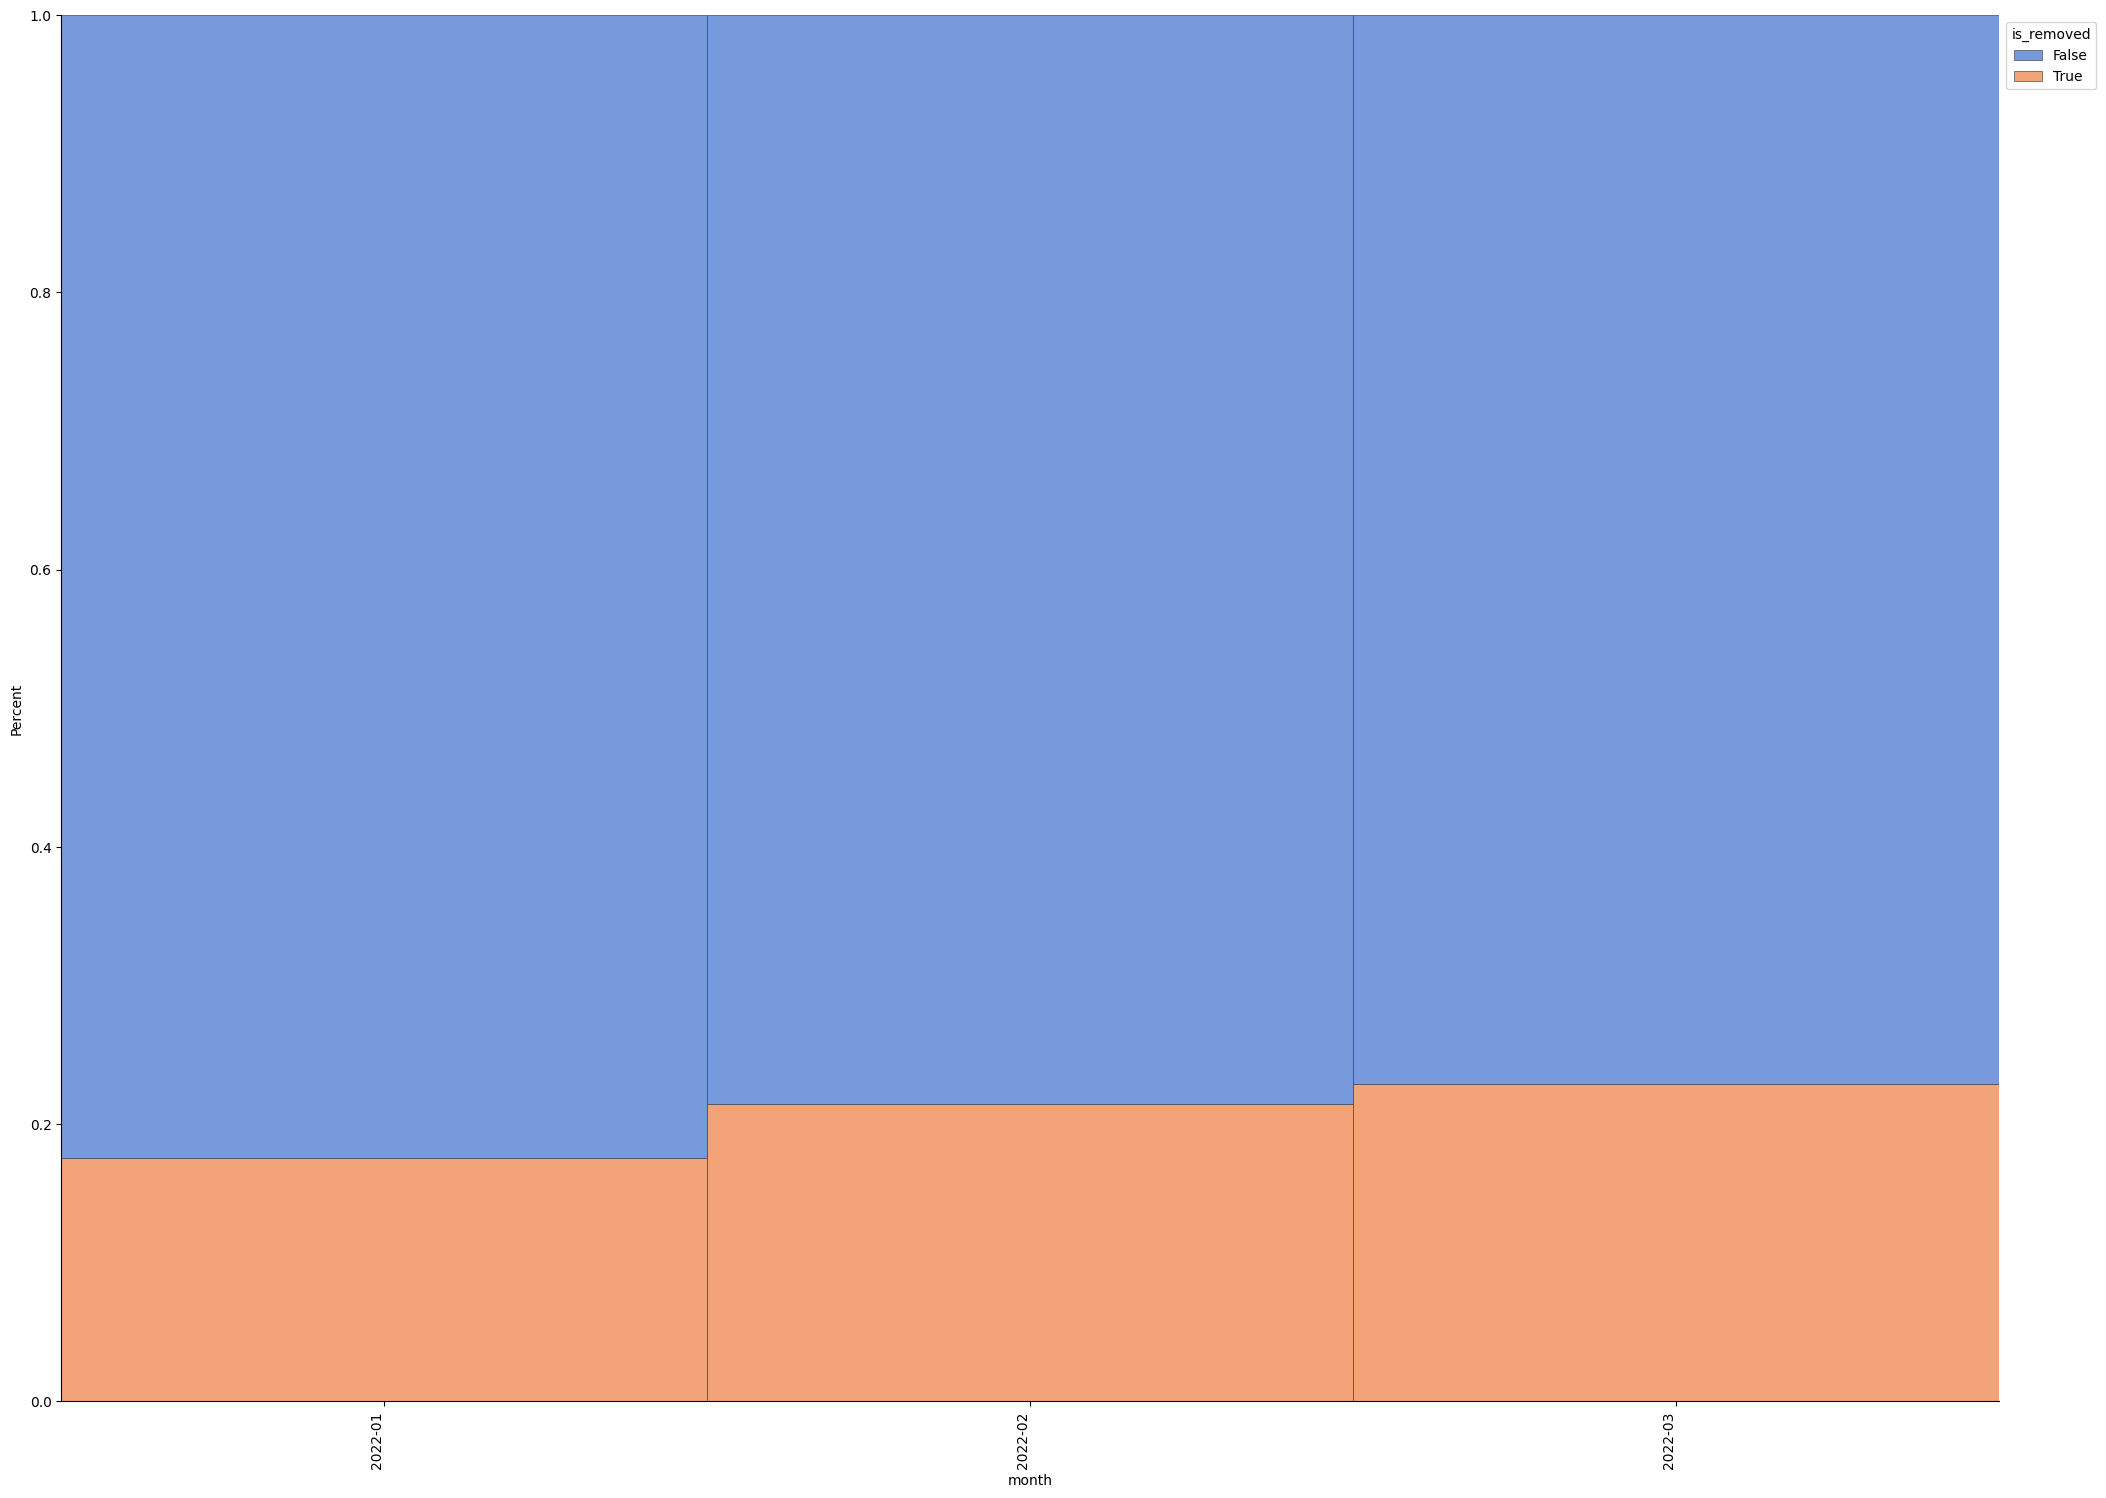

In [10]:
# plt removed data probability

f, ax = plt.subplots(figsize=(25, 18))
sns.despine(f)

ax = sns.histplot(
    all_data,
    x="month",
    hue="is_removed",
    palette="muted",
    edgecolor=".3",
    linewidth=0.5,
    stat="percent",
    multiple="fill",
)

plt.xticks(rotation=90, ha='right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [11]:
# check removed_retio
total_count = all_data.shape[0]
removed_count = removed_data.shape[0]
existing_count = existing_data.shape[0]
print(total_count, removed_count, existing_count)
print(total_count == removed_count + existing_count)
removed_ratio = ((removed_count/total_count) * 100, (existing_count/total_count) * 100)
removed_ratio

49831 10225 39606
True


(20.519355421324075, 79.48064457867594)

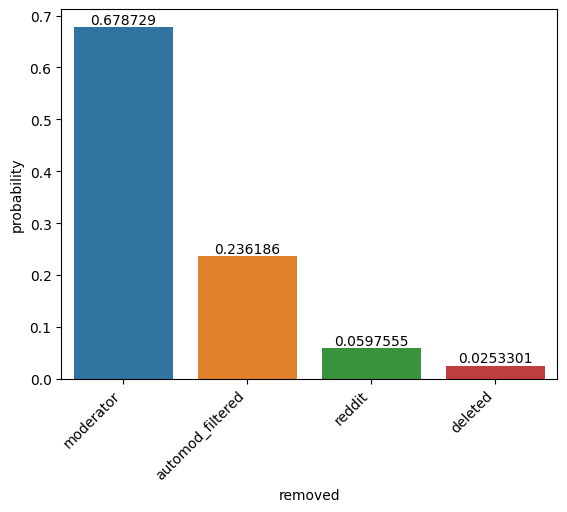

In [13]:
# plot removed type distribution 

removed_distribution = removed_data["removed"].value_counts(normalize=True)
removed_distribution = removed_distribution.to_frame(name="probability")
removed_distribution["removed"] = removed_distribution.index
ax = sns.barplot(data=removed_distribution, x="removed", y="probability")
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45, ha='right')
plt.show()

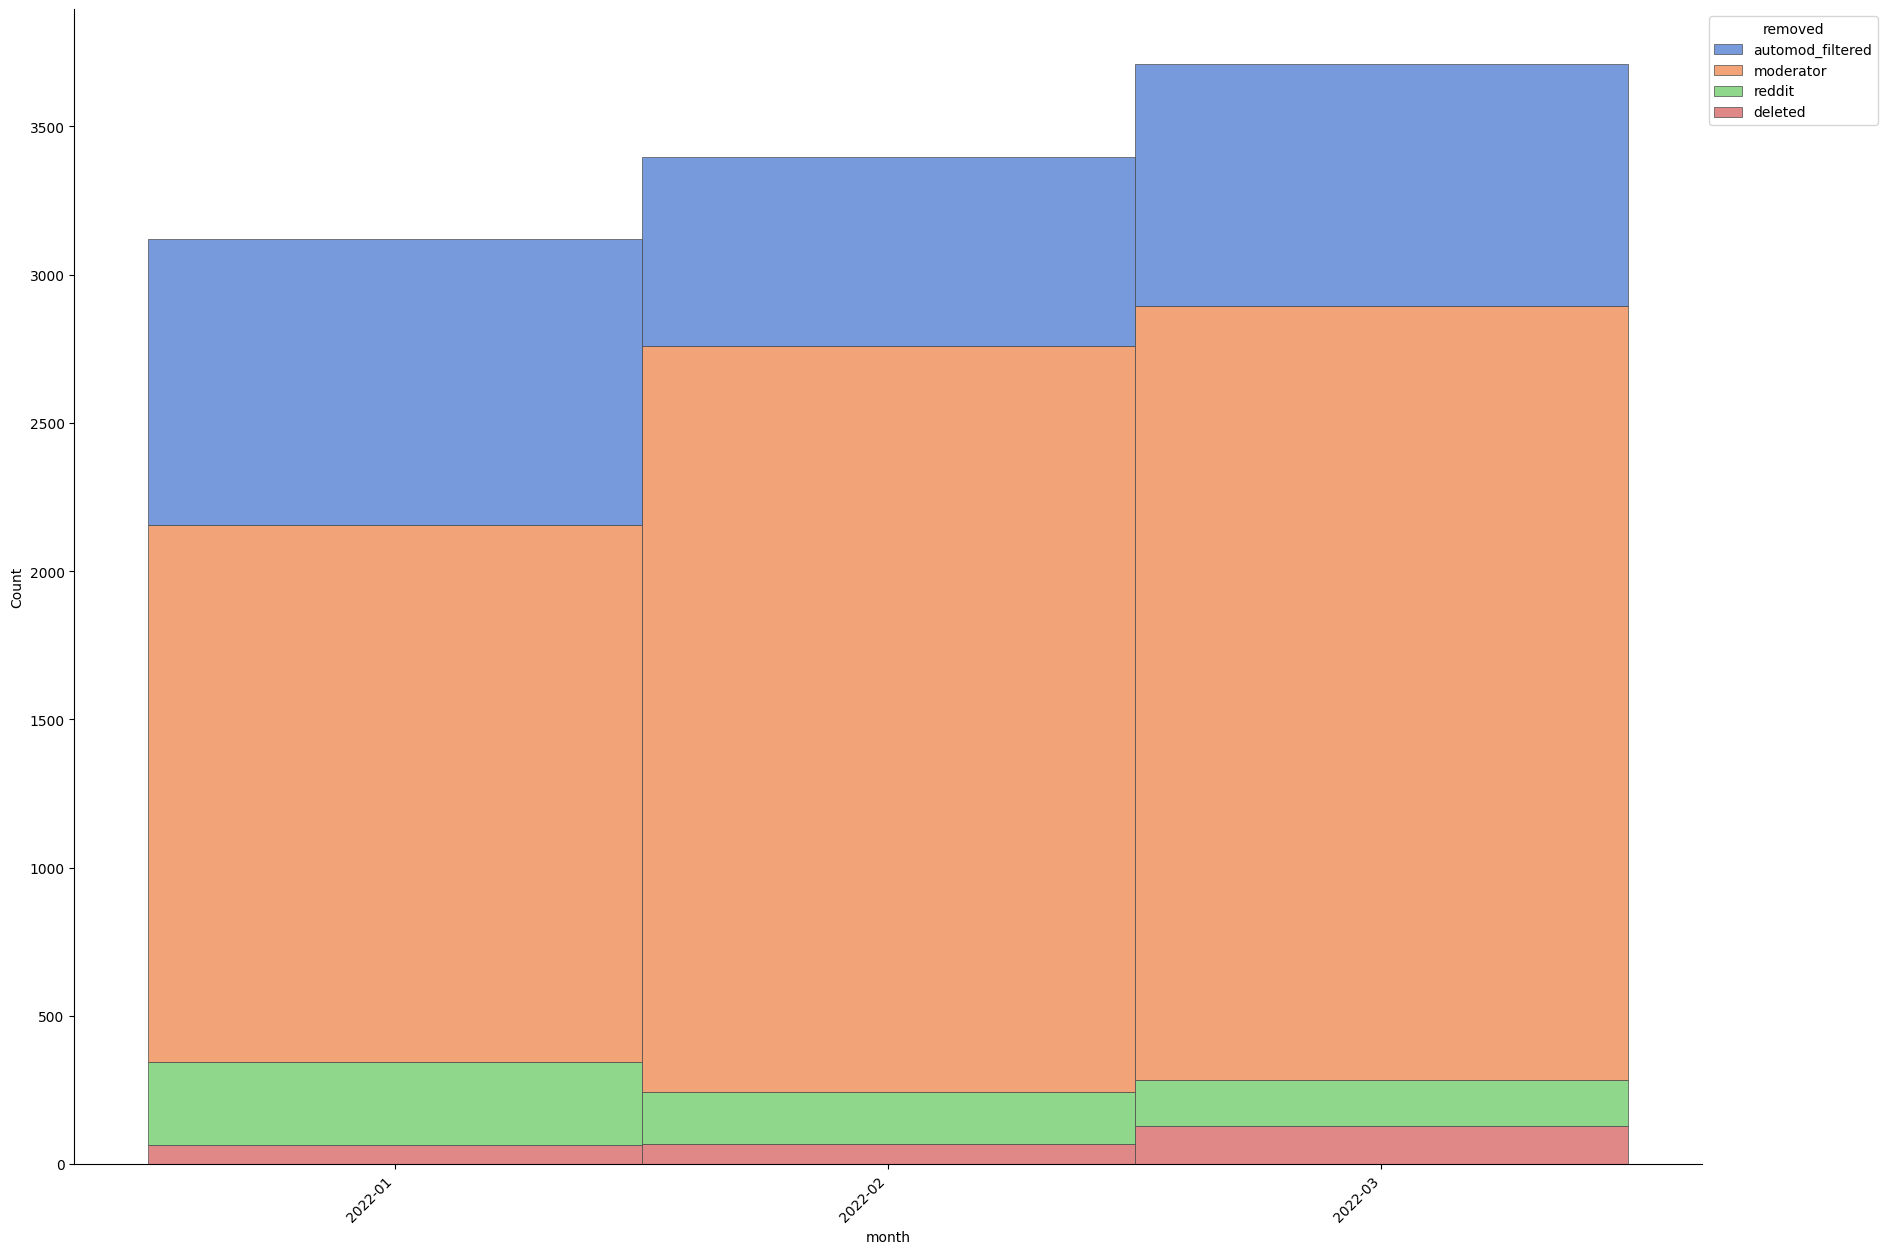

In [14]:
# plot removed type

f, ax = plt.subplots(figsize=(21, 15))
sns.despine(f)

sns.histplot(
    removed_data,
    x="month",
    hue="removed",
    multiple="stack",
    palette="muted",
    edgecolor=".3",
    linewidth=0.5,
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

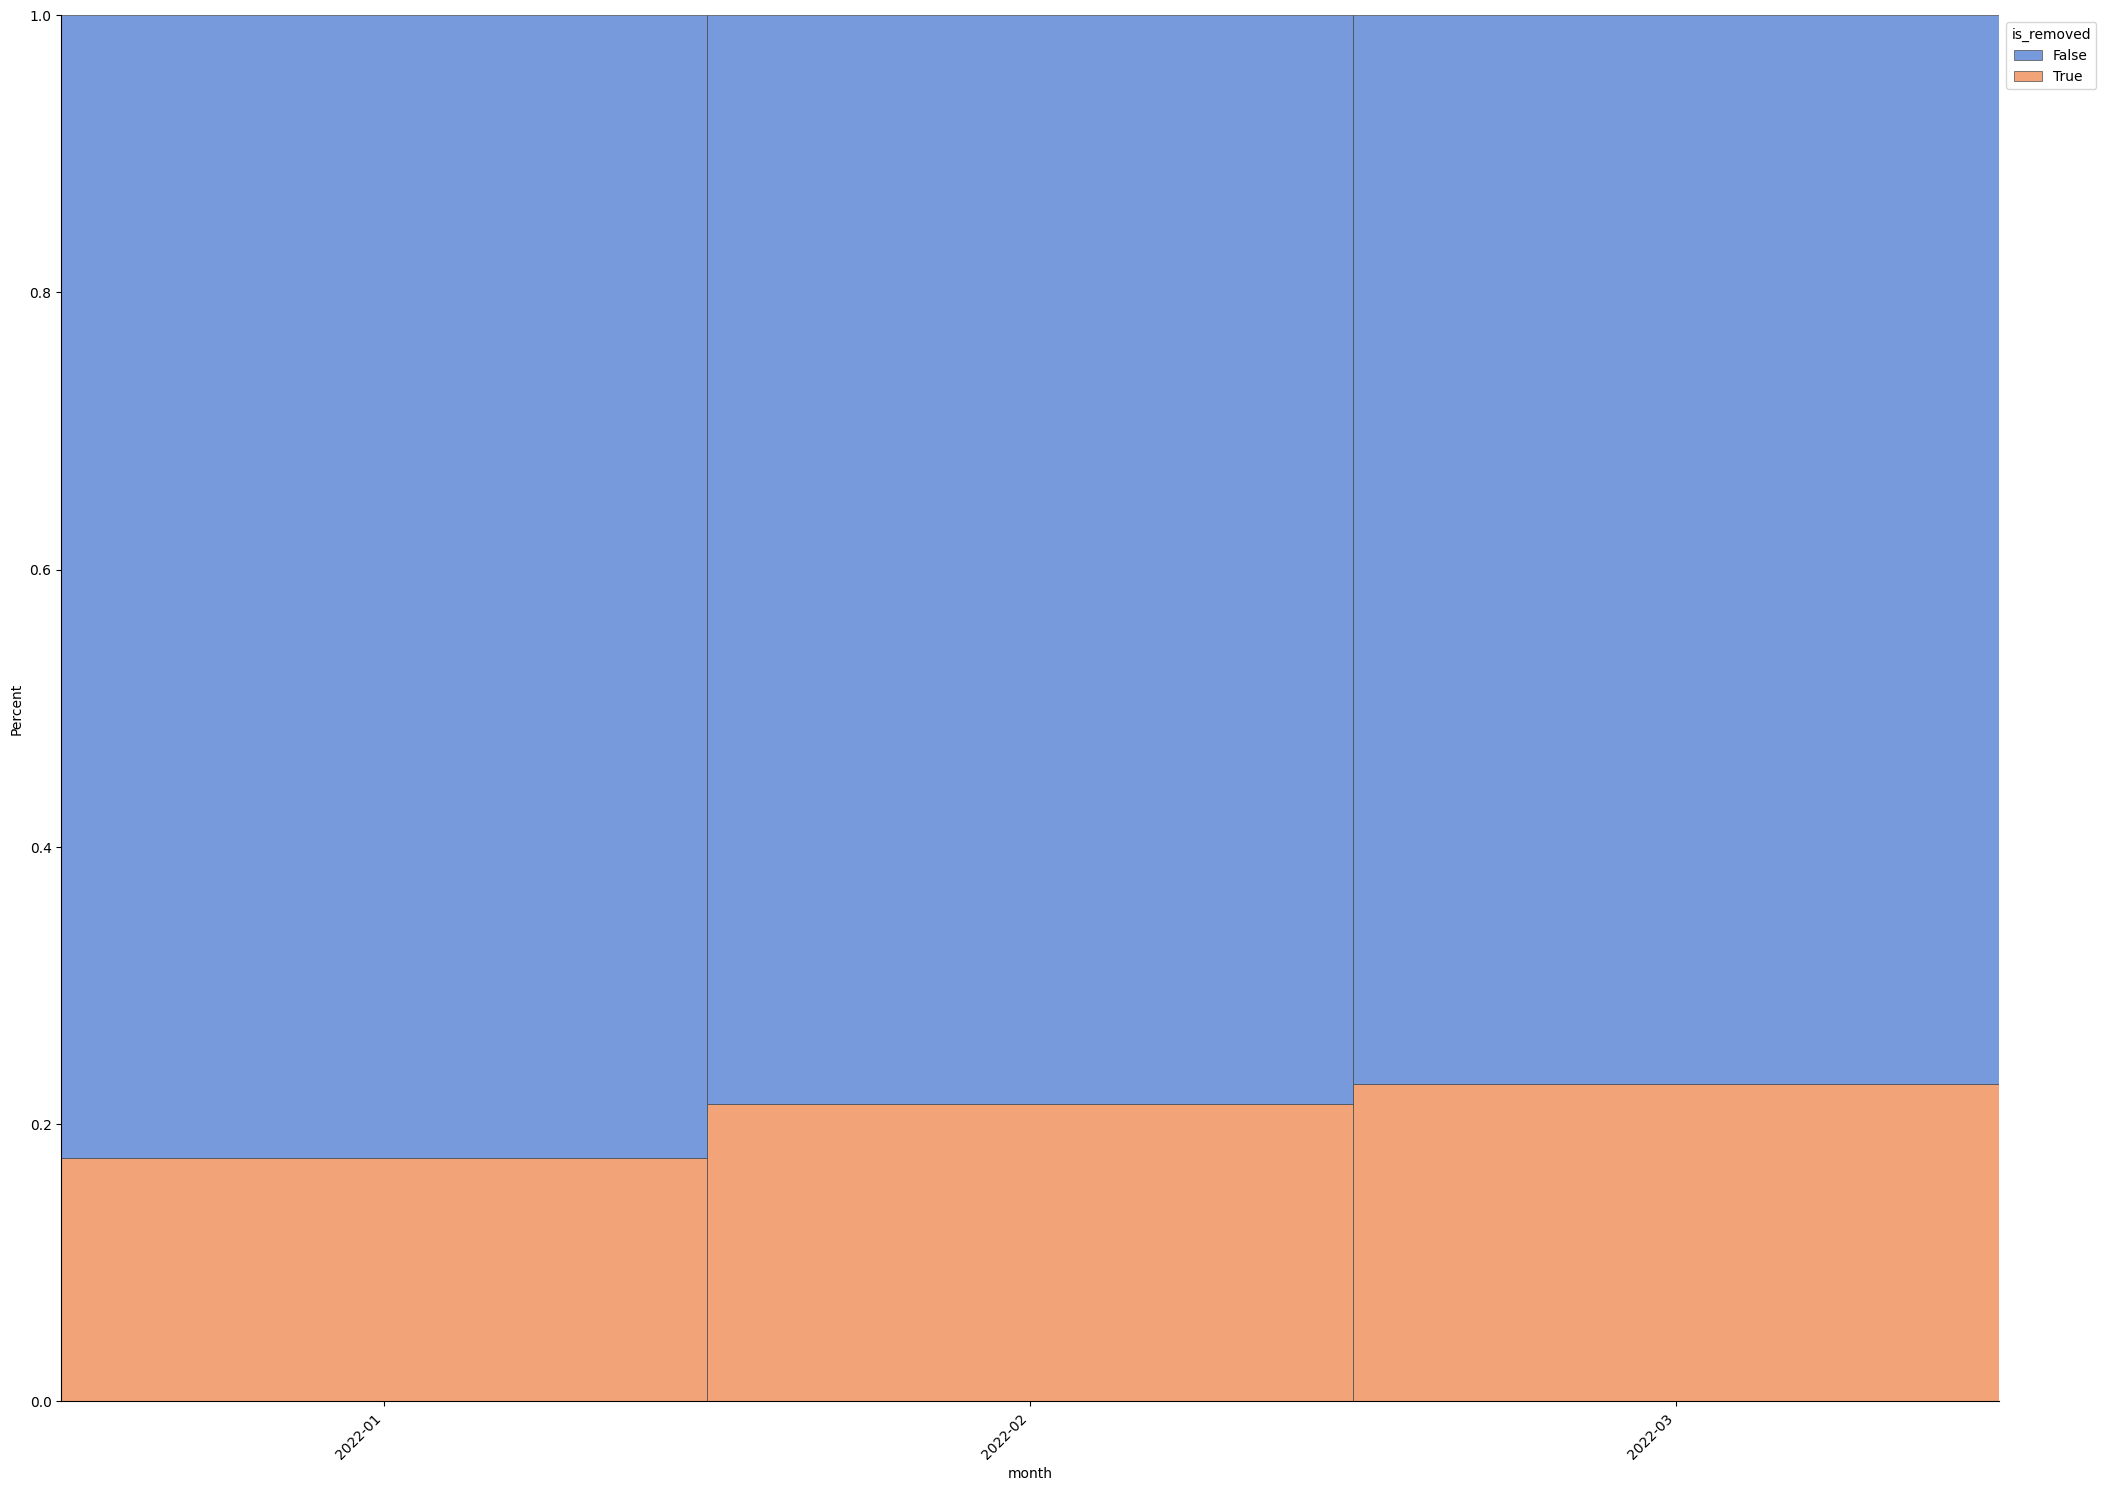

In [15]:
# plot removed type probability

f, ax = plt.subplots(figsize=(25, 18))
sns.despine(f)

sns.histplot(
    all_data,
    x="month",
    hue="is_removed",
    palette="muted",
    edgecolor=".3",
    linewidth=0.5,
    stat="percent",
    multiple="fill",
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

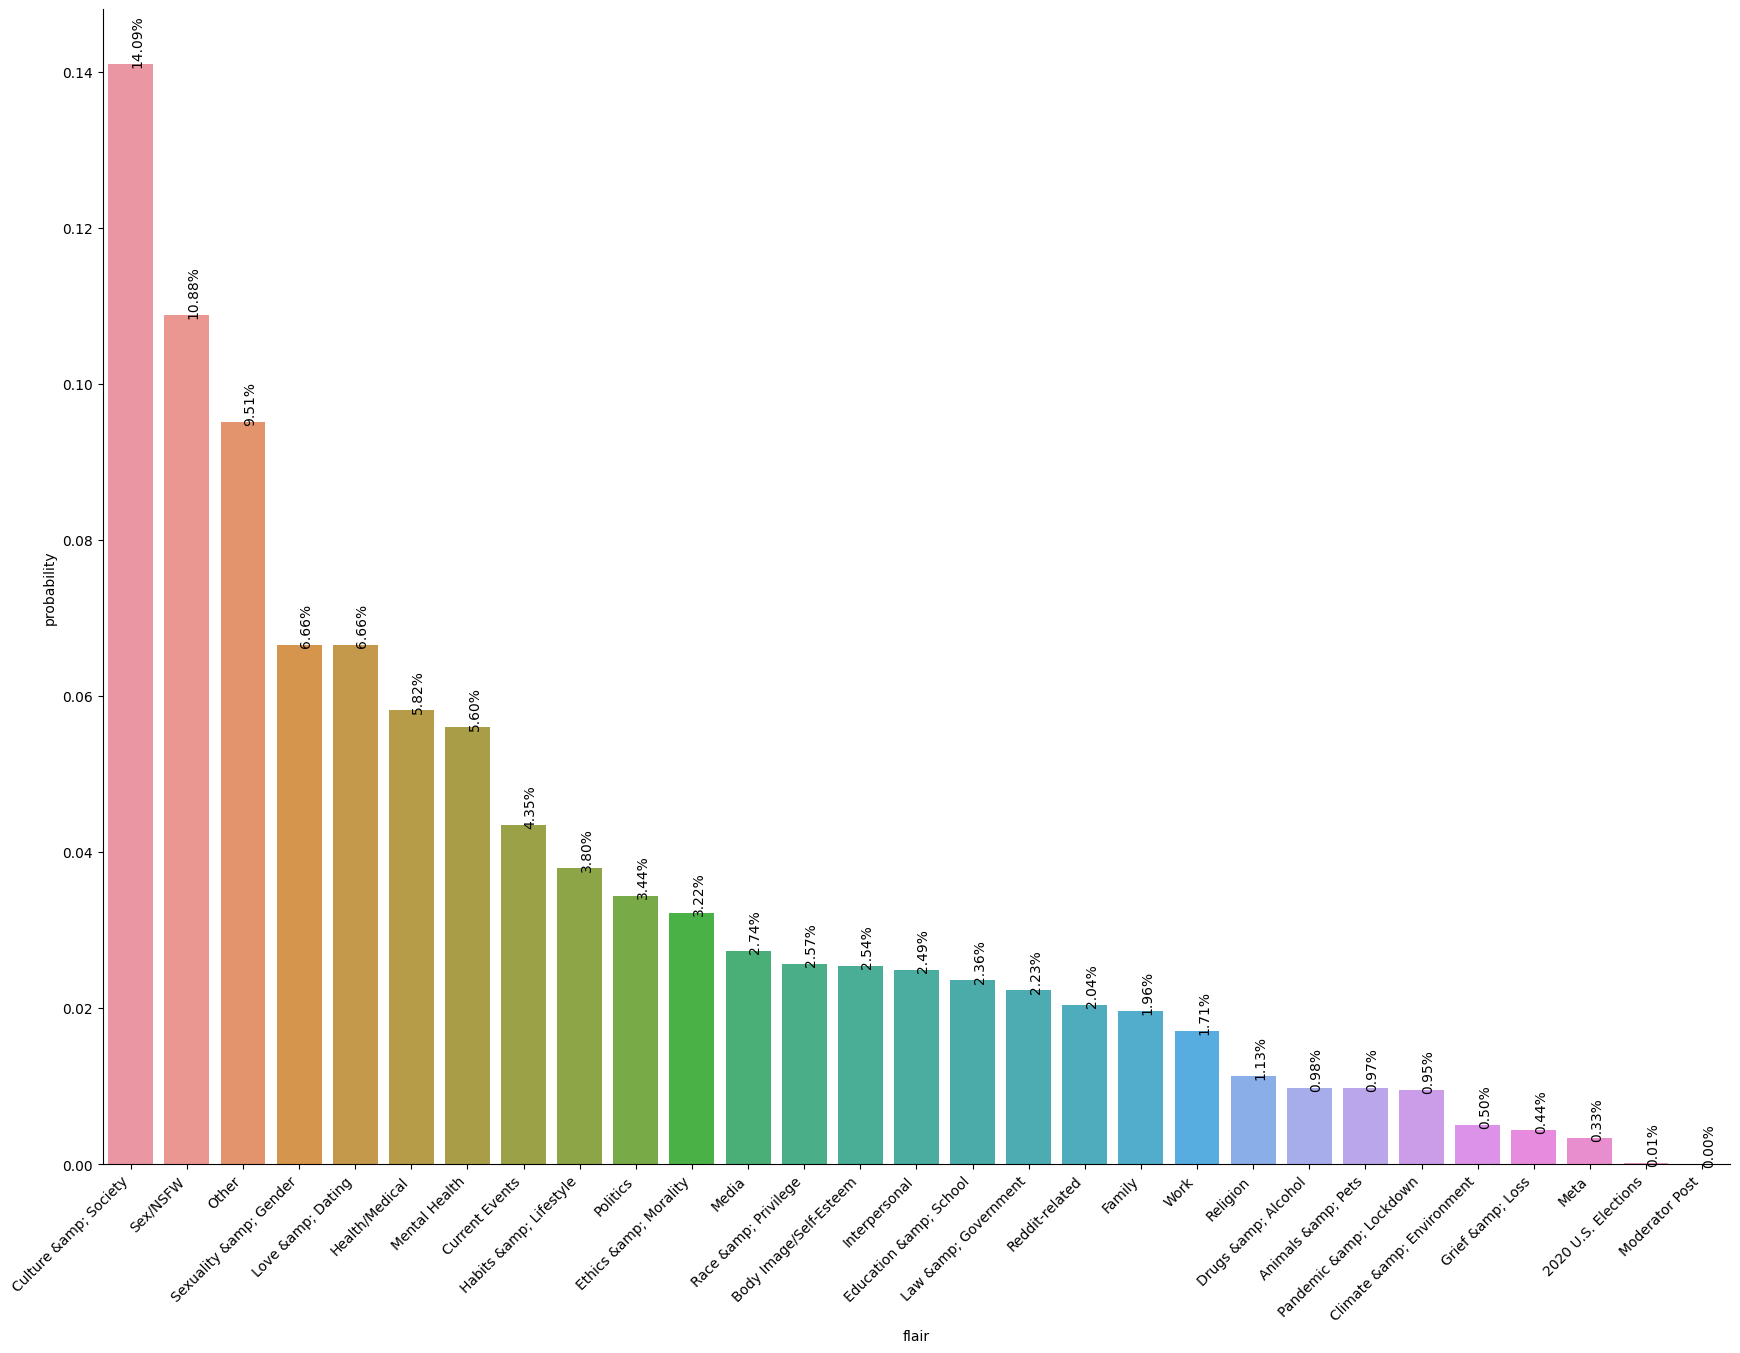

In [17]:
# plot flair type distribution

flaired_distribution = flaired_data["flair"].value_counts(normalize=True)
flaired_distribution = flaired_distribution.to_frame(name="probability")
flaired_distribution["flair"] = flaired_distribution.index 

f, ax = plt.subplots(figsize=(21, 15))
sns.despine(f)

ax = sns.barplot(data=flaired_distribution, x="flair", y="probability")
for i, v in enumerate(flaired_distribution["probability"].iteritems()):        
    ax.text(i ,v[1], "{:.2%}".format(v[1]), rotation=90)
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
# filter relevant flairs

RELEVANT_FLAIRS = list(flaired_distribution[flaired_distribution["probability"] >= 0.001]["flair"])

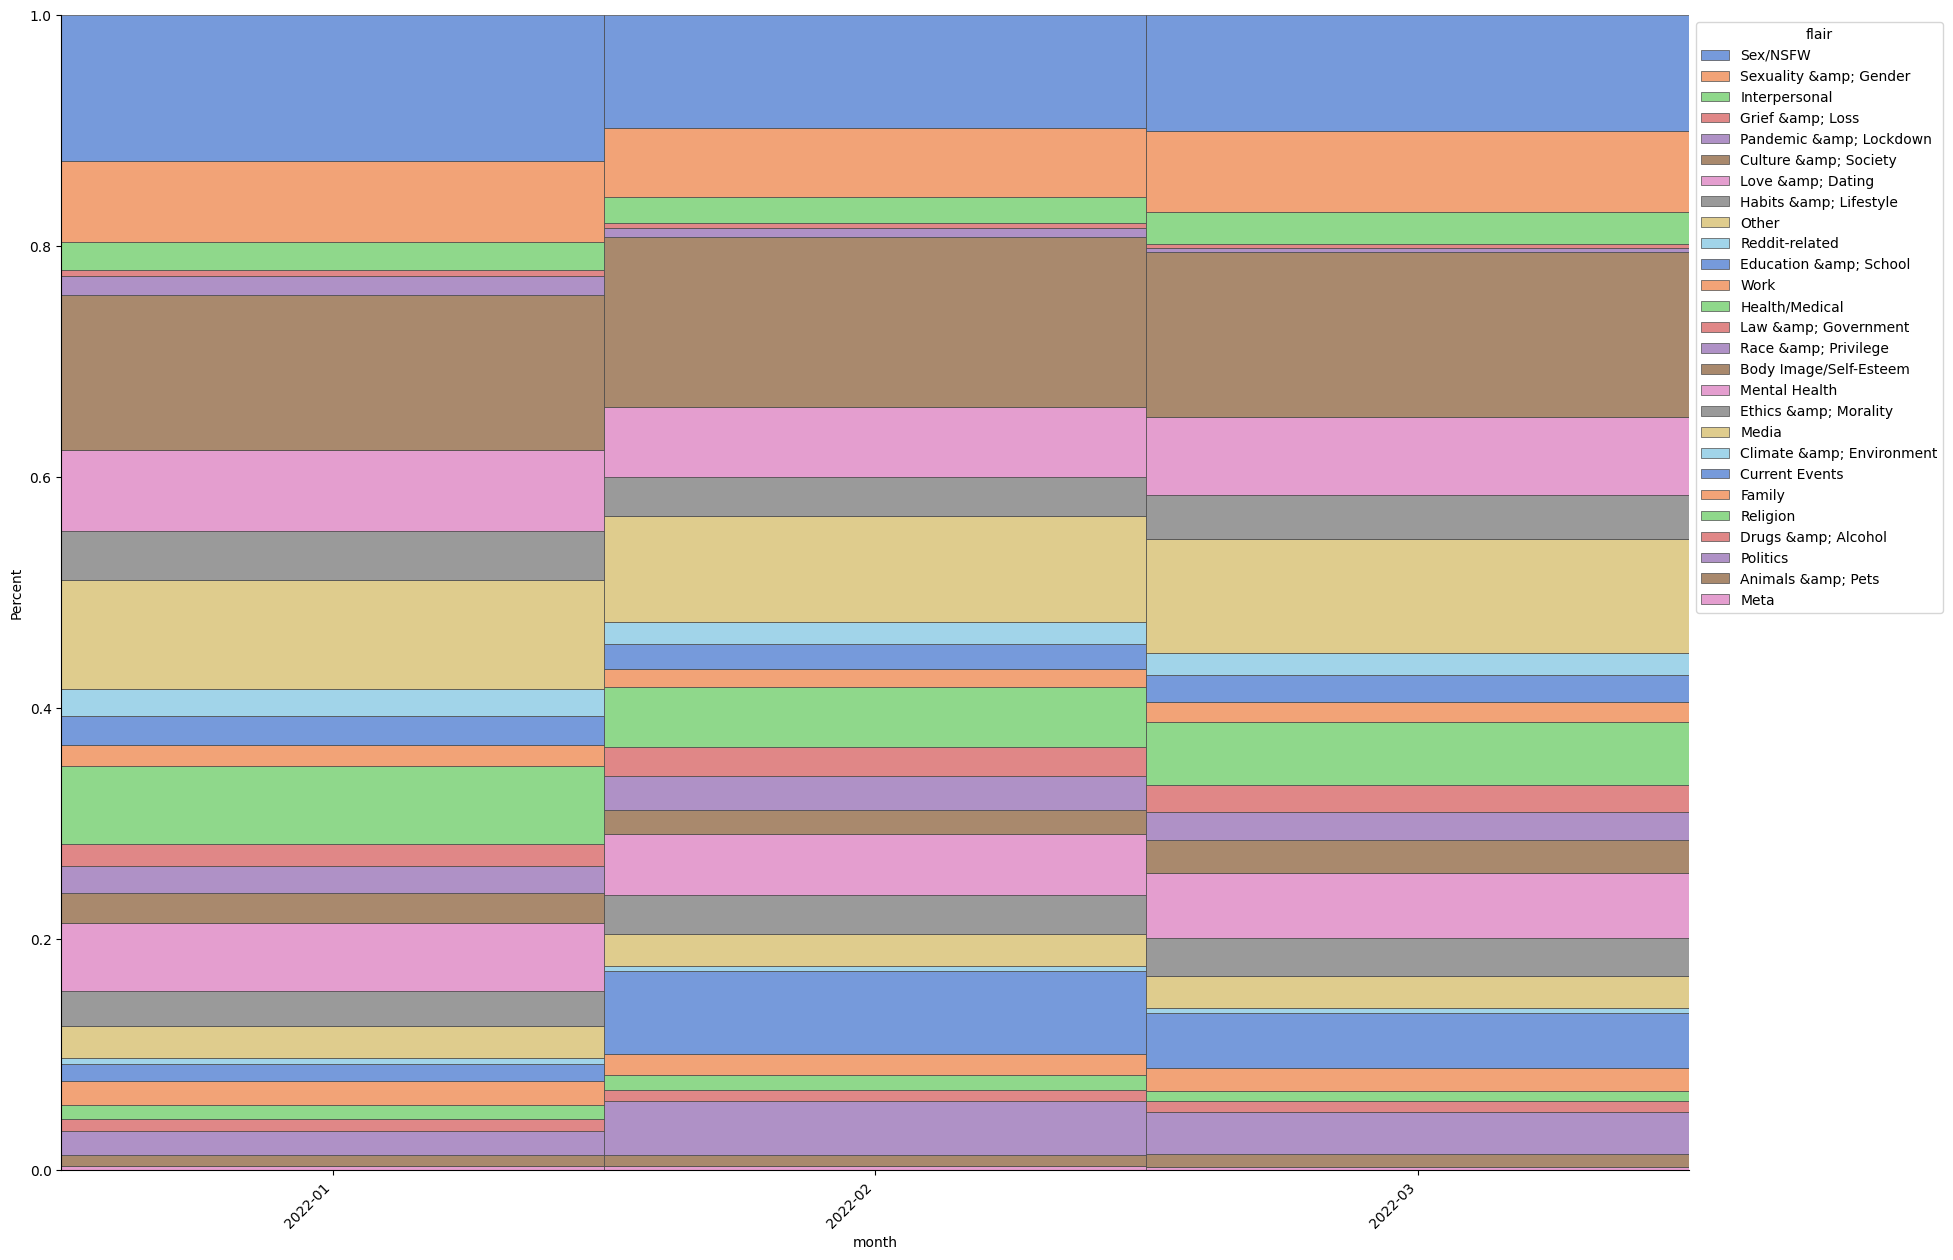

In [20]:
# plot flair type probability

flair_data = flaired_data[flaired_data["flair"].isin(RELEVANT_FLAIRS)]

f, ax = plt.subplots(figsize=(21, 15))
sns.despine(f)

ax = sns.histplot(
    flair_data,
    x="month",
    hue="flair",
    palette="muted",
    edgecolor=".3",
    linewidth=0.5,
    stat="percent",
    multiple="fill",
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

# User Data

In [21]:
# get user posting behaviors

user_data = pd.read_json(USER_DATA_PATH)
user_data = user_data.T

post_20 = user_data[user_data["total_posts"] <= 20]
post_20_50 = user_data.loc[(user_data["total_posts"] > 20) & (user_data["total_posts"] <= 50)]
post_50_100 = user_data.loc[(user_data["total_posts"] > 50) & (user_data["total_posts"] <= 100)]
post_100 = user_data[user_data["total_posts"] > 100]

       range   count
0      x<=20  155103
1   20<x<=50     892
2  50<x<=100     214
3     x>=100      64


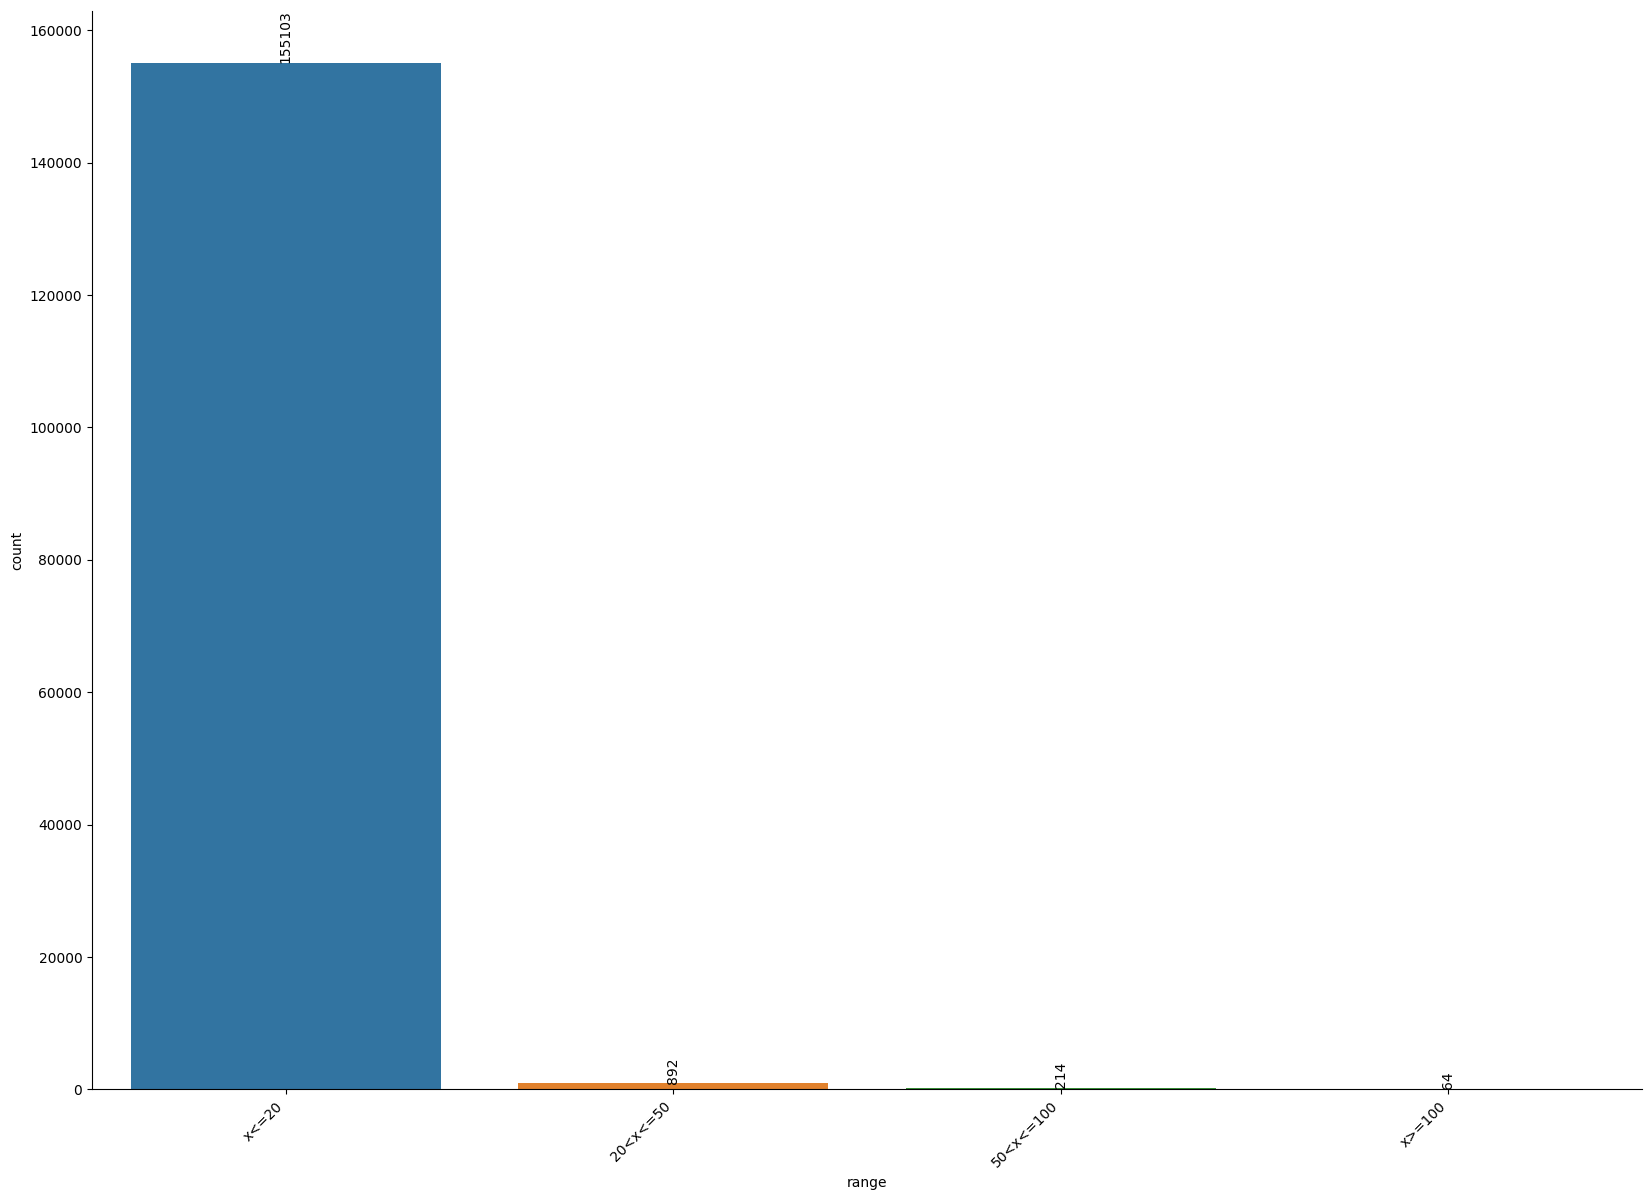

In [23]:
# plot posting behavior distribution

postcount_districution = pd.DataFrame()
postcount_districution["range"] = ["x<=20","20<x<=50","50<x<=100","x>=100"]
postcount_districution["count"] = [155103,892,214,64]

print(postcount_districution)

f, ax = plt.subplots(figsize=(20, 14))
sns.despine(f)
ax = sns.barplot(data=postcount_districution, x="range", y="count")  
for i in ax.containers:
    ax.bar_label(i, rotation=90)
plt.xticks(rotation=45, ha='right')
plt.show()

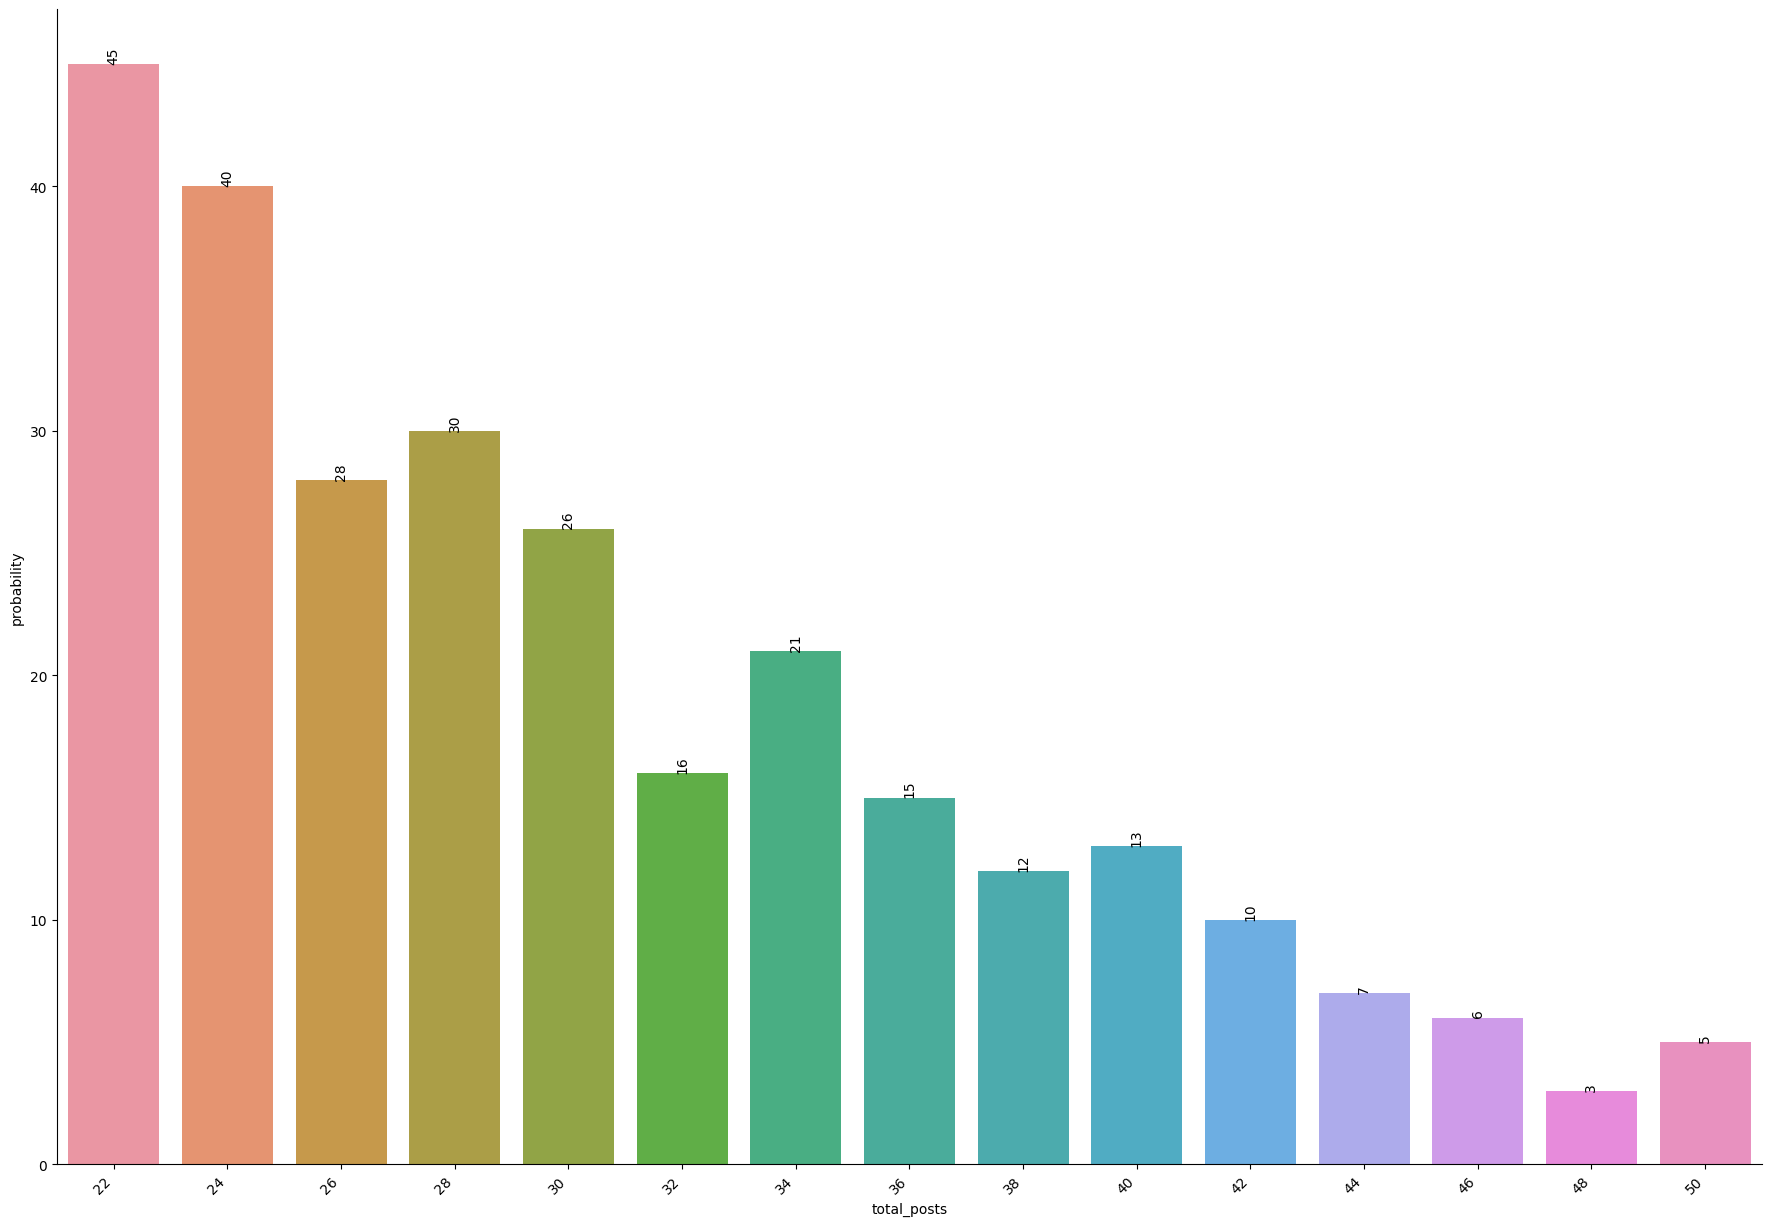

In [24]:
# plot distribution of specific type of posting behavior

post_distribution = post_20_50["total_posts"].value_counts()
post_distribution = post_distribution.to_frame(name="probability")
post_distribution["total_posts"] = post_distribution.index 

f, ax = plt.subplots(figsize=(22, 15))
sns.despine(f)

ax = sns.barplot(data=post_distribution, x="total_posts", y="probability")  
for i in ax.containers:
    ax.bar_label(i, rotation=90)

plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
# adding posting behavior to user data

def get_activity(x):
    if x == 1:
        return "posts=1"
    elif x <= 5:
        return "1<posts<=5"
    elif x > 5 and x <= 10:
        return "5<posts<=10"
    elif x > 10 and x <= 20:
        return "10<posts<=20"
    elif x > 20 and x <= 50:
        return "20<posts<=50"
    elif x > 50 and x <= 100:
        return "50<posts<=100"
    elif x > 100 and x <= 300:
        return "100<posts<=300"
    elif x > 300:
        return "posts>300"

user_data["activity"] = list(user_data["total_posts"])
user_data["activity"] = user_data["activity"].apply(get_activity)

In [26]:
user_data.head(3)

,author,active_period,active_span,flair_ratio,remove_ratio,total_posts,total_score,max_score,total_comments,comment_ratio,max_comments,upvote_ratio,activity
[deleted],[deleted],"{'start_date': '2022-01-01 02:12:41', 'end_dat...","89 days, 20:26:13","{'no_flair': 0, 'Culture &amp; Society': 36, '...","{'exist': 3, 'deleted': 259, 'moderator': 7, '...",548,-9,{'trlavd': 2},348,"{'no_flair': 0, 'Habits &amp; Lifestyle': 4, '...",{'trai6h': 31},"{'highest': {'trd8ir': 0.75}, 'lowest': {'trge...",posts>300
SuccessfulManifests,SuccessfulManifests,"{'start_date': '2022-01-23 16:36:46', 'end_dat...","67 days, 3:21:08","{'no_flair': 0, 'Culture &amp; Society': 60, '...","{'exist': 124, 'moderator': 13}",274,-1,{'trauxs': -1},595,"{'no_flair': 0, 'Other': 21, 'Culture &amp; So...",{'tbxv2s': 29},"{'highest': {'trauxs': 0.43}, 'lowest': {'trau...",100<posts<=300
SkepticDrinker,SkepticDrinker,"{'start_date': '2022-01-01 23:27:49', 'end_dat...","88 days, 15:08:11","{'no_flair': 0, 'Love &amp; Dating': 11, 'Cult...","{'exist': 123, 'moderator': 2}",250,-1,{'t2t8y4': -1},575,"{'no_flair': 0, 'Politics': 42, 'Religion': 40...",{'srvz78': 69},"{'highest': {'t2t8y4': 0.5}, 'lowest': {'t2t8y...",100<posts<=300


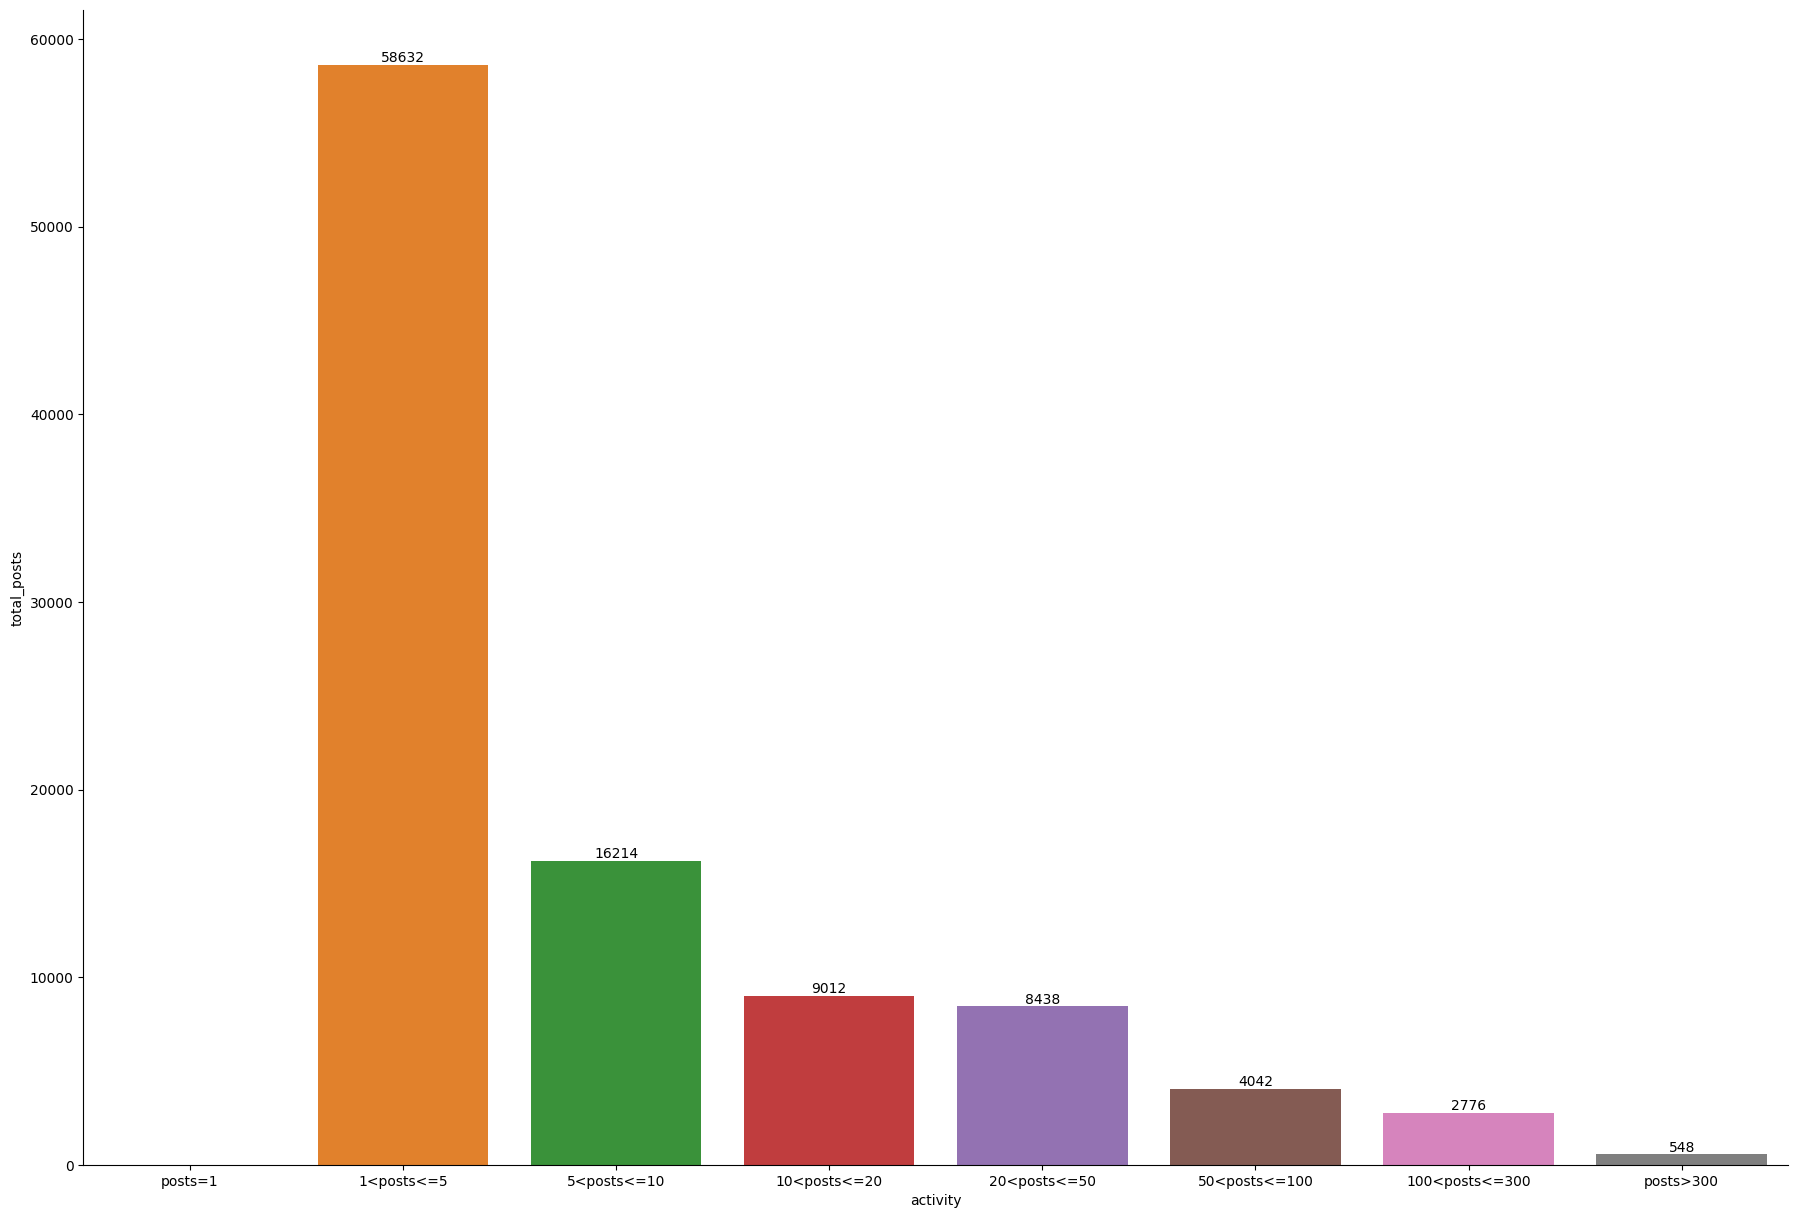

In [27]:
# plot user behavior distribution

activity_dict = user_data["activity"].to_dict()
activity_distribution = user_data.groupby("activity")["total_posts"].sum().to_dict()
activity_distribution = pd.DataFrame(data=activity_distribution, index=["total_posts"])
activity_distribution = activity_distribution.T
activity_distribution["activity"] = activity_distribution.index 

f, ax = plt.subplots(figsize=(22, 15))
sns.despine(f)

ax = sns.barplot(data=activity_distribution, x="activity", y="total_posts", order = ["posts=1", "1<posts<=5", "5<posts<=10","10<posts<=20","20<posts<=50","50<posts<=100","100<posts<=300", "posts>300"])  
for i in ax.containers:
    ax.bar_label(i)
plt.xticks()
plt.show()


In [32]:
# adding exist posts status to user data

exist = []
for d in user_data["remove_ratio"]:
    x = d.get("exist")
    if x == None:
        x = 0
    exist.append(x)
user_data["exist_posts"] = exist

In [33]:
user_data.head(3)

,author,active_period,active_span,flair_ratio,remove_ratio,total_posts,total_score,max_score,total_comments,comment_ratio,max_comments,upvote_ratio,activity,exist_posts
[deleted],[deleted],"{'start_date': '2022-01-01 02:12:41', 'end_dat...","89 days, 20:26:13","{'no_flair': 0, 'Culture &amp; Society': 36, '...","{'exist': 3, 'deleted': 259, 'moderator': 7, '...",548,-9,{'trlavd': 2},348,"{'no_flair': 0, 'Habits &amp; Lifestyle': 4, '...",{'trai6h': 31},"{'highest': {'trd8ir': 0.75}, 'lowest': {'trge...",posts>300,3
SuccessfulManifests,SuccessfulManifests,"{'start_date': '2022-01-23 16:36:46', 'end_dat...","67 days, 3:21:08","{'no_flair': 0, 'Culture &amp; Society': 60, '...","{'exist': 124, 'moderator': 13}",274,-1,{'trauxs': -1},595,"{'no_flair': 0, 'Other': 21, 'Culture &amp; So...",{'tbxv2s': 29},"{'highest': {'trauxs': 0.43}, 'lowest': {'trau...",100<posts<=300,124
SkepticDrinker,SkepticDrinker,"{'start_date': '2022-01-01 23:27:49', 'end_dat...","88 days, 15:08:11","{'no_flair': 0, 'Love &amp; Dating': 11, 'Cult...","{'exist': 123, 'moderator': 2}",250,-1,{'t2t8y4': -1},575,"{'no_flair': 0, 'Politics': 42, 'Religion': 40...",{'srvz78': 69},"{'highest': {'t2t8y4': 0.5}, 'lowest': {'t2t8y...",100<posts<=300,123


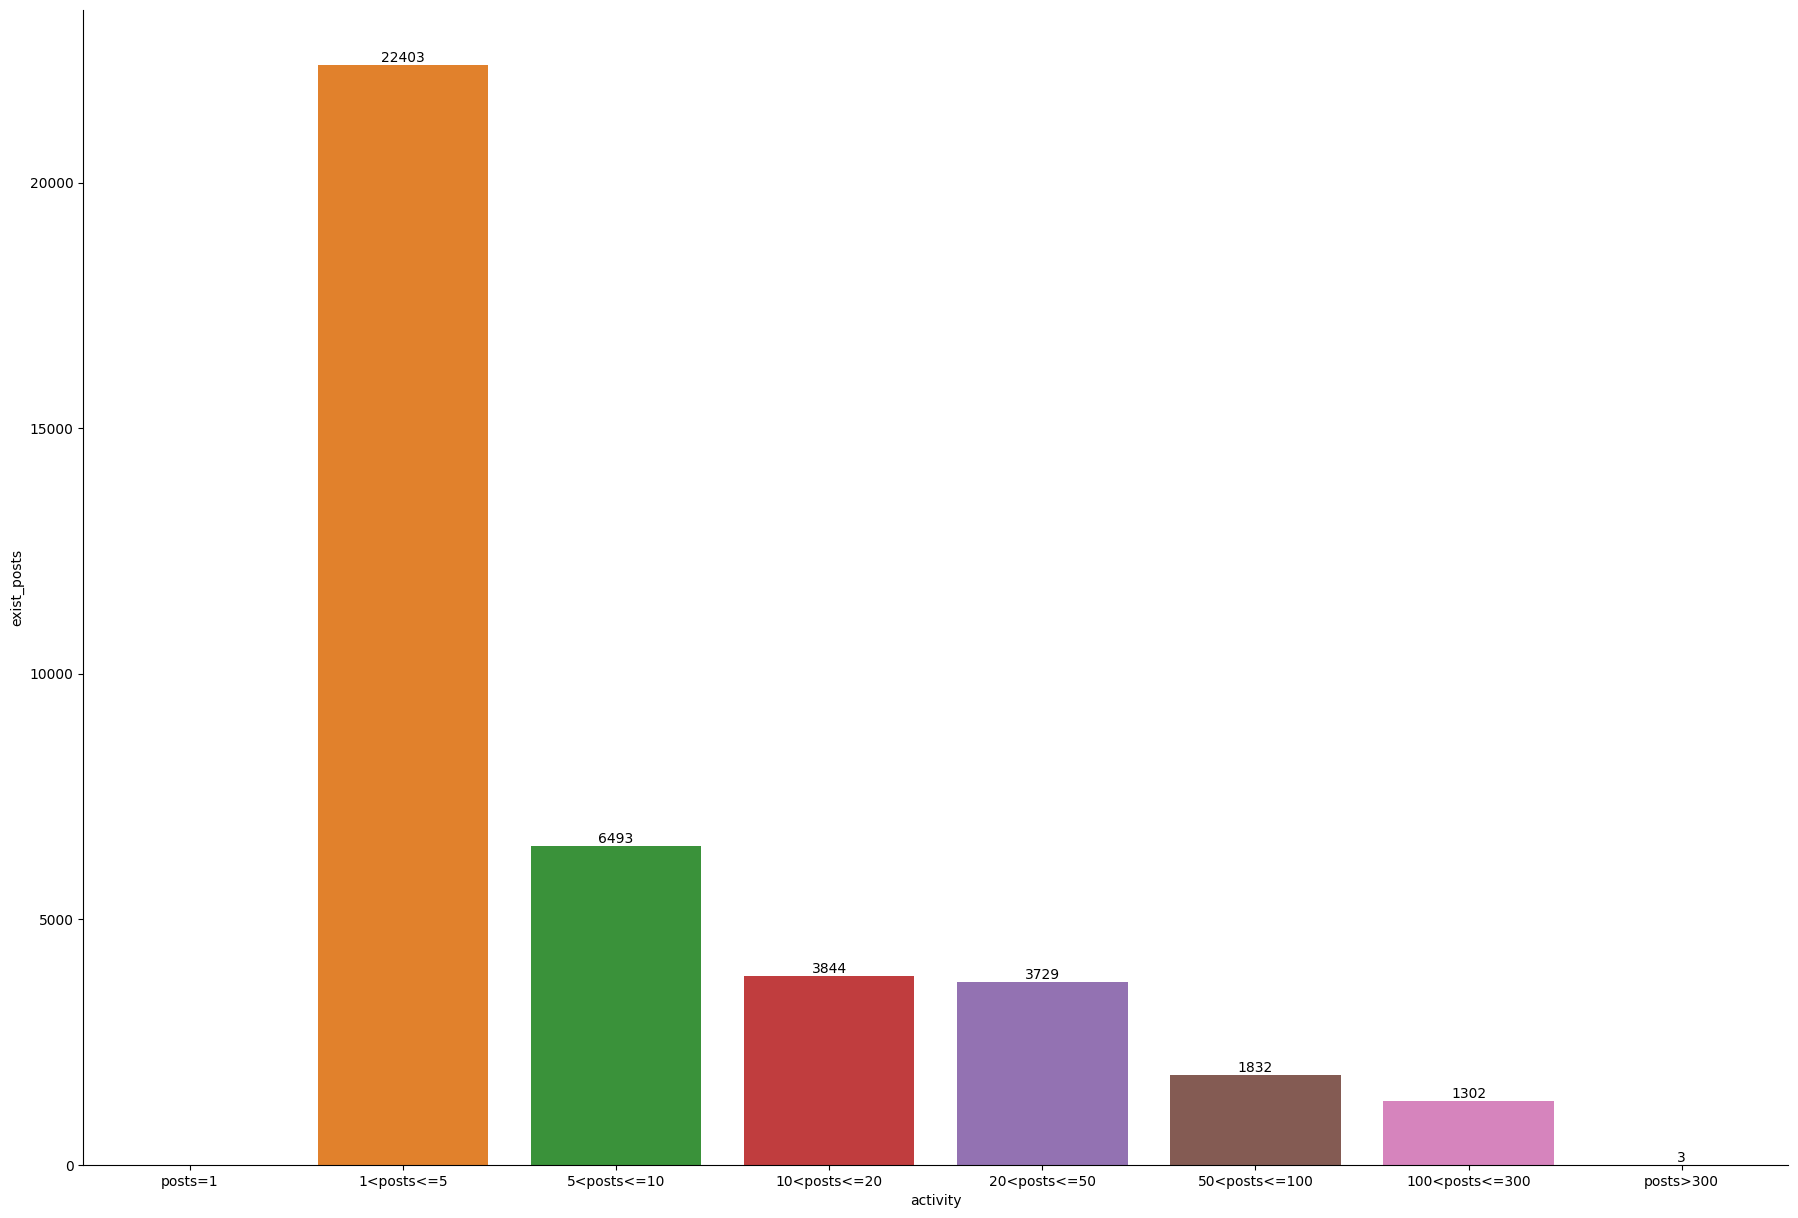

In [34]:
# plot exist posts distribution

activity_distribution = user_data.groupby("activity")["exist_posts"].sum().to_dict()
activity_distribution = pd.DataFrame(data=activity_distribution, index=["exist_posts"])
activity_distribution = activity_distribution.T
activity_distribution["activity"] = activity_distribution.index 

f, ax = plt.subplots(figsize=(22, 15))
sns.despine(f)

ax = sns.barplot(data=activity_distribution, x="activity", y="exist_posts", order = ["posts=1", "1<posts<=5", "5<posts<=10","10<posts<=20","20<posts<=50","50<posts<=100","100<posts<=300", "posts>300"])  
for i in ax.containers:
    ax.bar_label(i)
plt.xticks()
plt.show()

In [35]:
# add posting behavior to all data

def check_activity(user, d = activity_dict):
    if user in d.keys():
        activity = d[user]
        return activity
    else:
        return None

all_data["activity"] = list(all_data["author"])
all_data["activity"] = all_data["activity"].apply(check_activity)

In [37]:
all_data.head(3)


,post_id,author,total_posts,title,selftext,flair,removed,utc,date,month,score,upvote_ratio,num_comments,num_crossposts,subreddit_subscribers,flaired,is_removed,activity
0,rt5jmb,Red_Bear_28,10,Is ahego actually sexy?,Ok im a cosplay fan and lately a lot of cospla...,Sex/NSFW,None,1640991642,2022-01-01 00:00:42,2022-01,1,1.0,0,0,1442902,True,False,5<posts<=10
1,rt5krl,disasterbabe,2,How do you come out to a group of straight guys?,[removed],Sexuality &amp; Gender,automod_filtered,1640991730,2022-01-01 00:02:10,2022-01,1,1.0,0,0,1442906,True,True,1<posts<=5
2,rt5m8u,icedark98,2,Did you have facade around friend and messagin...,,Interpersonal,None,1640991844,2022-01-01 00:04:04,2022-01,1,1.0,0,0,1442909,True,False,1<posts<=5


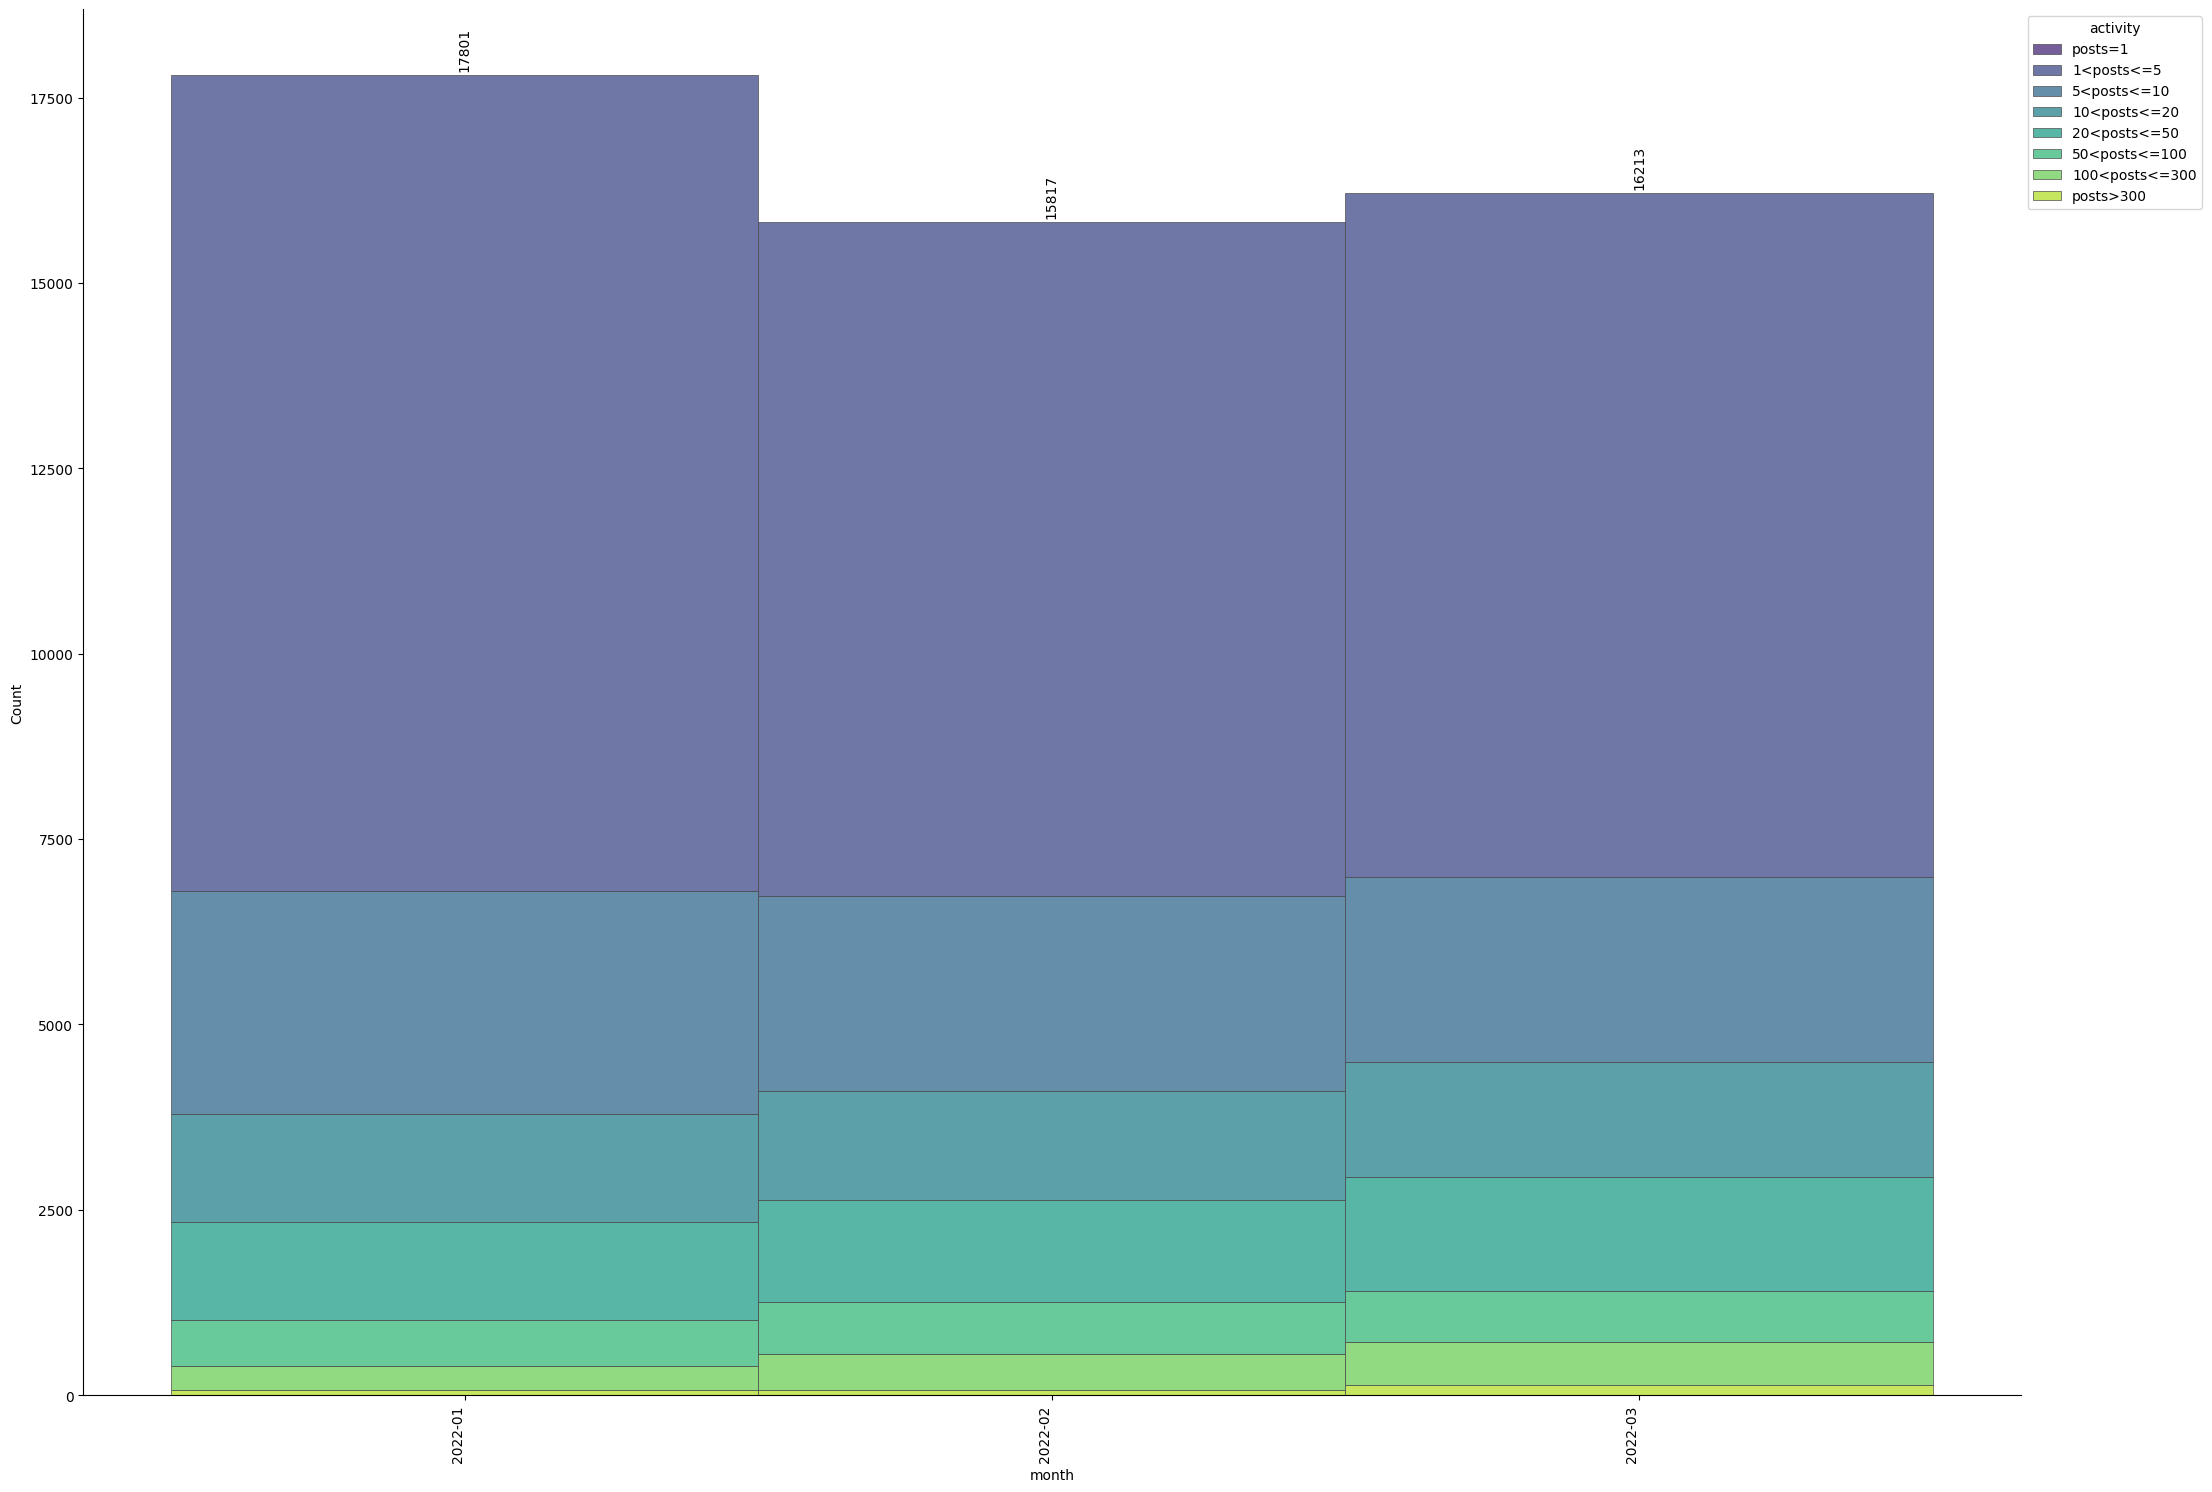

In [39]:
# plot posts made by different type of users

f, ax = plt.subplots(figsize=(25, 18))
sns.despine(f)

ax = sns.histplot(
    all_data,
    x="month",
    hue="activity",
    hue_order=["posts=1", "1<posts<=5", "5<posts<=10","10<posts<=20","20<posts<=50","50<posts<=100","100<posts<=300", "posts>300"],
    multiple="stack",
    palette="viridis",
    edgecolor=".3",
    linewidth=0.5,
)
coordinates = {}
for bin in ax._axes._children:
    if isinstance(bin, plt.Rectangle):
        x = bin._x0 + 0.5*bin._width
        y = bin._height

        if x not in coordinates:
            coordinates[x] = y
        else:
            coordinates[x] += y

for x, y in coordinates.items():
    plt.text(x, y+50, f"{y:.0f}", ha="center", va="bottom", rotation=90)

plt.xticks(rotation=90, ha='right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

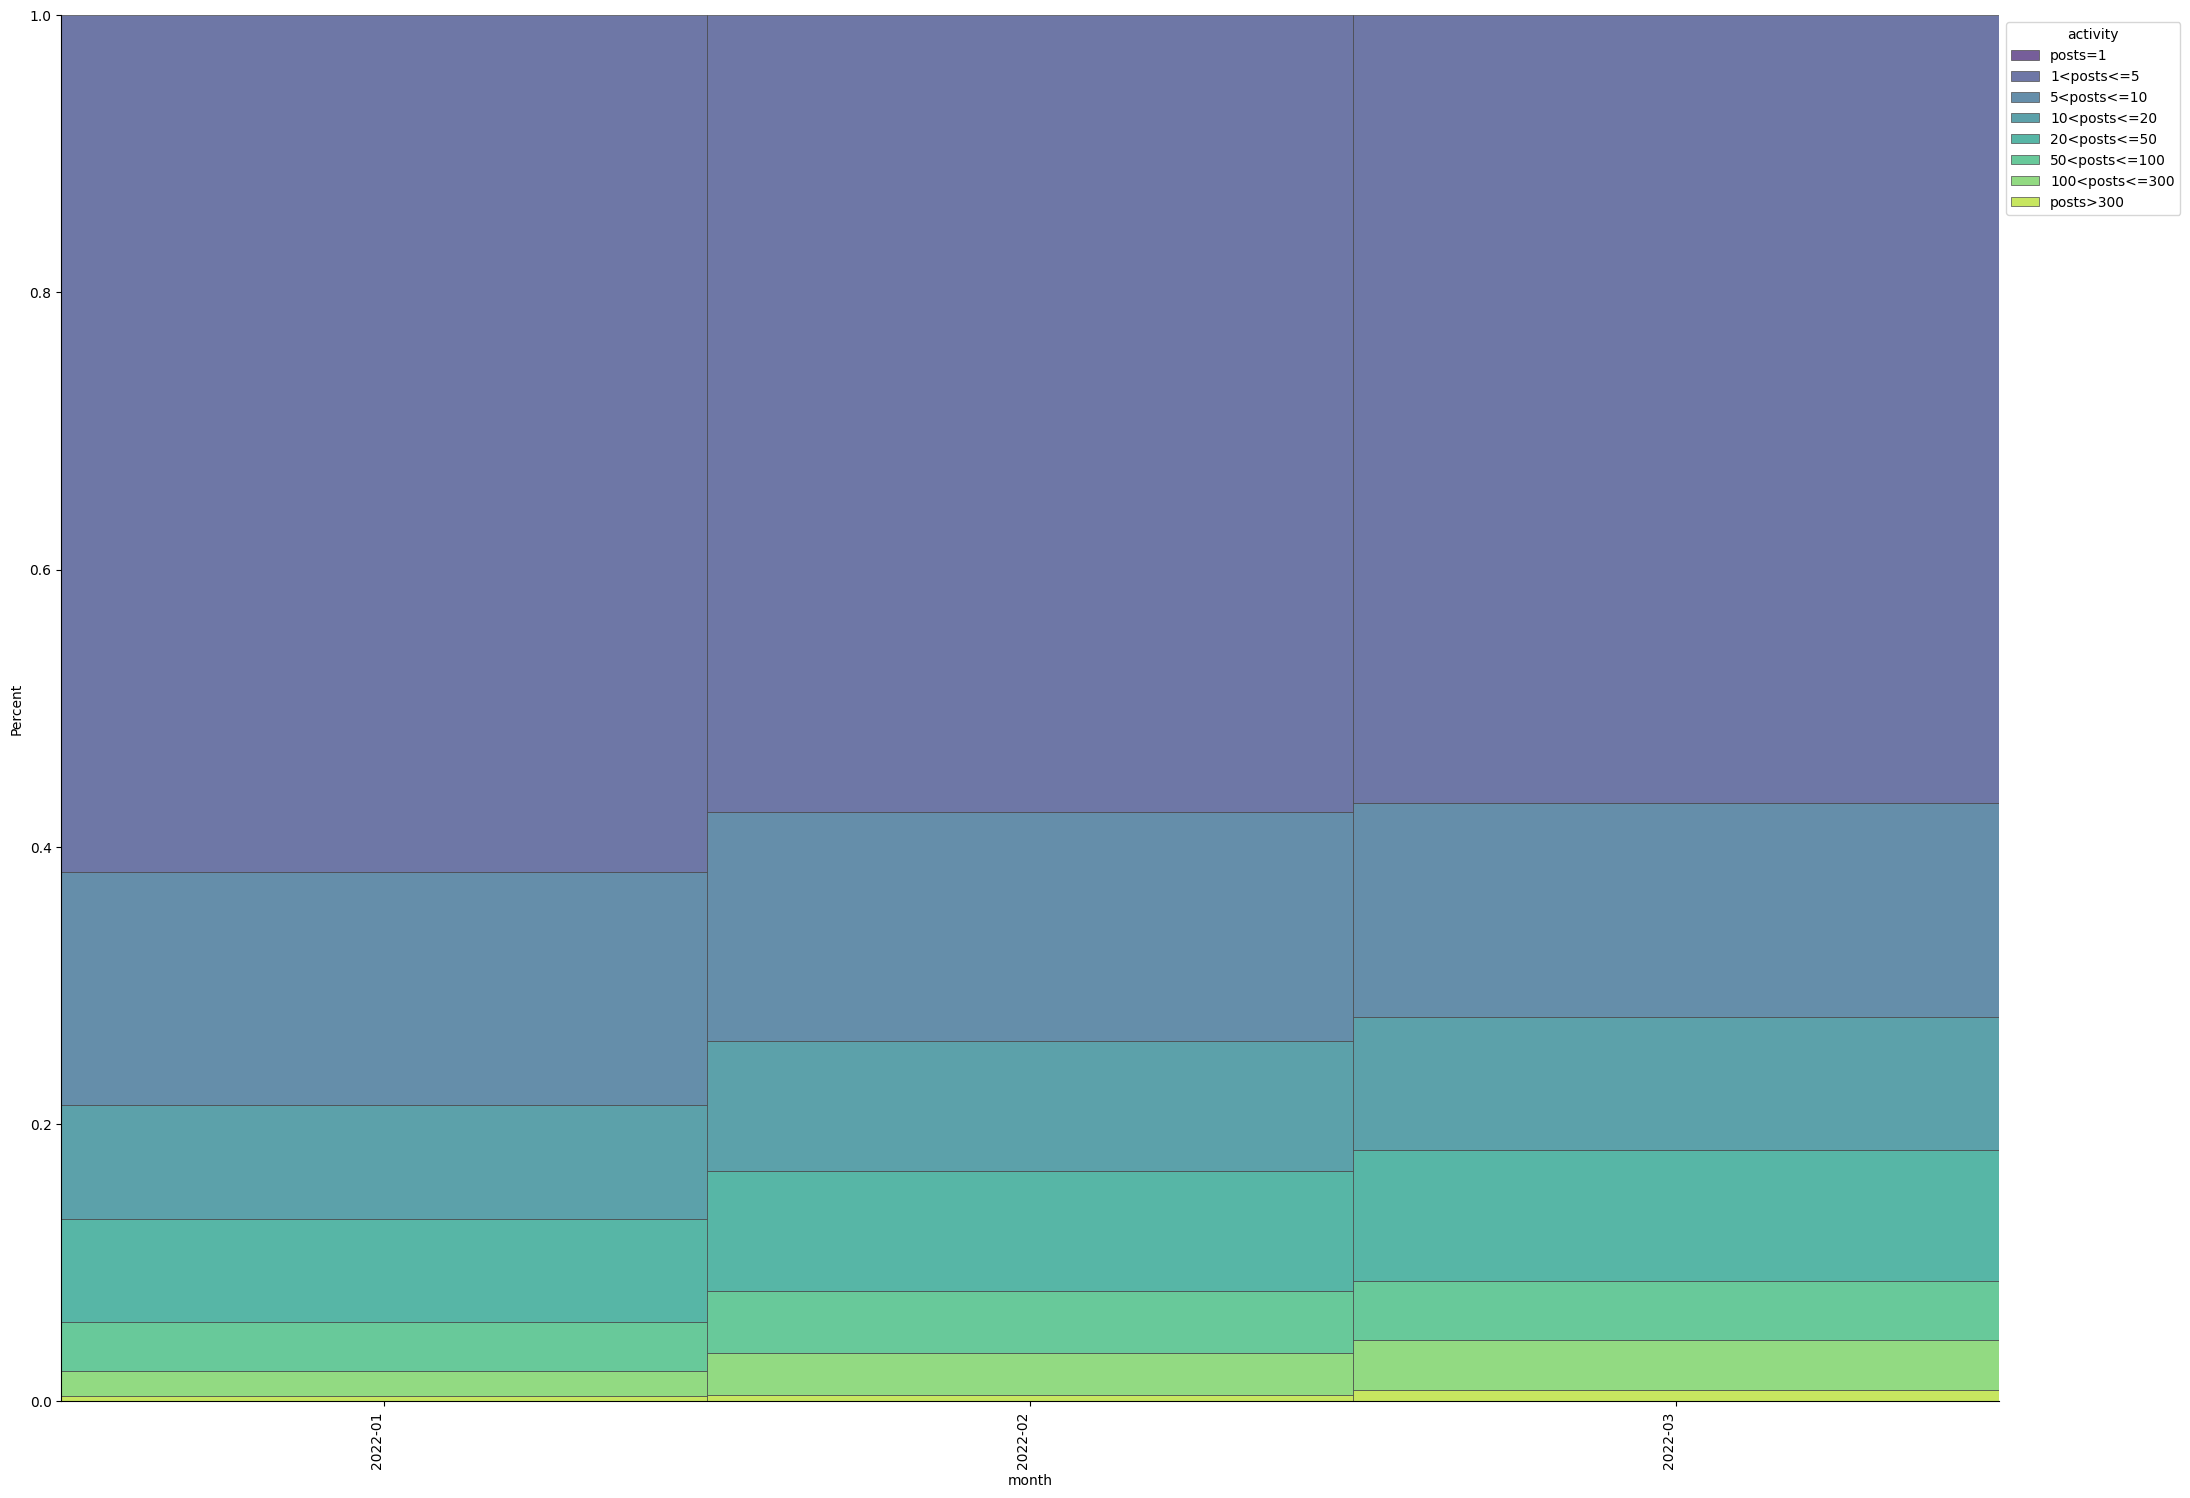

In [40]:
# plot posts made by different type of users probability

f, ax = plt.subplots(figsize=(25, 18))
sns.despine(f)

ax = sns.histplot(
    all_data,
    x="month",
    hue="activity",
    hue_order=["posts=1", "1<posts<=5", "5<posts<=10","10<posts<=20","20<posts<=50","50<posts<=100","100<posts<=300", "posts>300"],
    palette="viridis",
    edgecolor=".3",
    linewidth=0.5,
    stat="percent",
    multiple="fill",
)

plt.xticks(rotation=90, ha='right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()